In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import re
from scipy.stats import levene
from datetime import datetime 
from collections import Counter
pd.set_option('display.max_colwidth', None)
import statistics
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from datetime import timedelta
import pylab 
import scipy.stats as stats

# Проведение статистического исследования в рамках диссертационной работы (опытно-экспериментальной части) М. В. Пешкова на тему "Организационно-педагогические условия самообразовательной деятельности курсантов образовательных организаций МВД России"

>Для проведения статистического анализа нам необходимо определиться относительно:
    > - статистических критериев проверки имеющихся гипотез;
    > - уровня значимости / достоверности, в соответствии с которым мы будем проверять существующие гипотезы; 
    > - границ, области принятия решений относительно сформулированных гипотез.
    > - осуществить проверку выборок контрольной и экспериментальной групп на нормальность распределения (Гаусовское распределение)
    > - сделать проверку различия между контрольной и экспериментальной группами до проведения педагогического эксперимента и, соответственно, проверку о различии выборок после проведения эксперимента


### Формулируем две гипотезы

    -	Нулевая гипотеза: средние значения по проведенным методикам выборок контрольной и экспериментальной групп до проведения формирующего эксперимента и после его проведения не изменились, что говорит либо о неэффективности внедрения организационно-педагогических условий самообразовательной деятельности в образовательном процессе либо, в случае существенной положительной динамики изменения средних значений выборок у контрольной группы и отсутствия какого-либо изменения у экспериментальной группы, о том, что организационно-педагогические условия не  повышают уровень самообразовательной деятельности курсантов.
    
    
    -   Альтернативная гипотеза: средние показатели по проведенным методикам выборок контрольной и экспериментальной групп до проведения формирующего эксперимента и после его проведения существенно изменились, то есть можно проследить положительную или отрицательную динамику изменения показателей, что говорит о негативном воздействии или эффективности внедрения организационно-педагогических условий самообразовательной деятельности в образовательной процесс.



# Компонент самоорганиазция и самоуправление самообразовательной деятельности
    - Методика В.И Андреева

In [101]:
# Data before experiment
psy_1 = [31,33, 35,34,31,39,30,44,44,34,34,35,39,44,34,45,37,34,41,40,33, 29, 45]
ped_1 = [35,32,38,38,31,37,39,33,28,39,36,31,39,40,30,39,35,37,39,40,34,40]
psy_3 = [33, 39, 30, 31, 32, 33, 25, 35, 33, 30, 31, 27, 31, 44, 38, 40, 10]
ped_3 = [35, 26, 38, 33, 28, 32, 38, 27, 34, 25, 32, 26, 31, 49, 30, 21]
all_ped = ped_1 + ped_3 
all_psy = psy_1 + psy_3
print('Количество наблюдений в выборке психологов - ', len(all_psy))
print('Количество наблюдений в выборке педагогов - ', len(all_ped))
print('Общее количество участников ---> ', len(all_ped) + len(all_psy))

Количество наблюдений в выборке психологов -  40
Количество наблюдений в выборке педагогов -  38
Общее количество участников --->  78


In [102]:
# Data after experiment
psy_1_fin = [31,33, 31,34,34,39,29,44,44,34,34,35,39,44,34,45,37,33,41,42,33, 34, 44]
ped_1_fin = [37,38,40,39,33,36,40,35,33,39,36,32,42,40,32,39,35,37,39,40,35,41]
psy_3_fin = [34, 38, 33, 32, 32, 33, 24, 35, 36, 32, 32, 26, 32, 45, 39, 42, 13]
ped_3_fin = [36, 36, 39, 38, 37, 38, 38, 35, 36, 39, 37, 37, 35, 49, 40, 39]
all_psy_fin = psy_1_fin + psy_3_fin
all_ped_fin = ped_1_fin + ped_3_fin 
print('Количество наблюдений в выборке психологов - ', len(all_psy_fin))
print('Количество наблюдений в выборке педагогов - ', len(all_ped_fin))
print('Общее количество участников ---> ', len(all_psy_fin) + len(all_ped_fin))

Количество наблюдений в выборке психологов -  40
Количество наблюдений в выборке педагогов -  38
Общее количество участников --->  78


# Построение графиков нормальности распределения данных:
>Применение методов статистики для проверки гипотезы о нормальности распределения данных:

>1) Критерий Шапиро-Уилка

>2) Критерий Д’Агостино

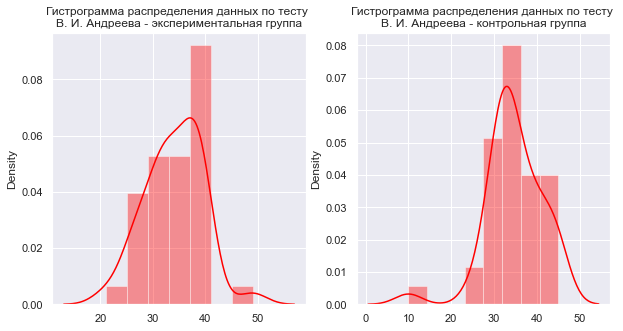

In [103]:
figure, axis = plt.subplots(1, 2)
figure.set_figheight(5)
figure.set_figwidth(10)
sns.distplot(all_ped ,color='red',label='bmi',ax=axis[0]).set_title('Гистрограмма распределения данных по тесту \nВ. И. Андреева - экспериментальная группа')
sns.distplot(all_psy,color='red',label='bmi',ax=axis[1]).set_title('Гистрограмма распределения данных по тесту \nВ. И. Андреева - контрольная группа')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


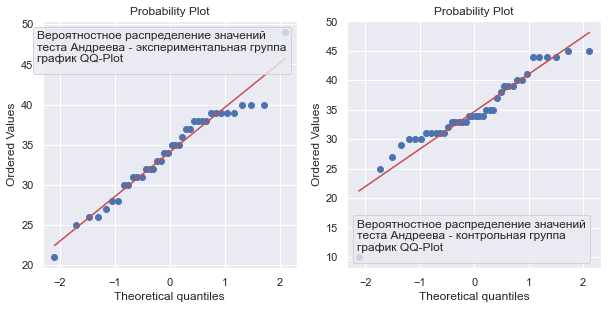

In [104]:
fig = plt.gcf()
fig.set_size_inches(10, 10)
pylab.subplot (2, 2, 2)
stats.probplot(all_psy, dist="norm", plot=pylab)
legend = pylab.legend()
legend.set_title('Вероятностное распределение значений\nтеста Андреева - контрольная группа\nграфик QQ-Plot')
pylab.subplot (2, 2, 1)
stats.probplot(all_ped, dist="norm", plot=pylab)
legend = pylab.legend()
legend.set_title('Вероятностное распределение значений\nтеста Андреева - экспериментальная группа\nграфик QQ-Plot')
pylab.show()
pylab.show()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


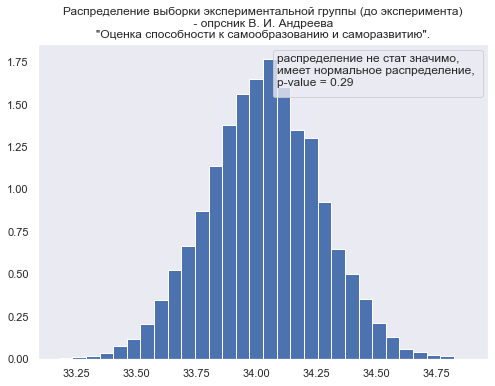

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


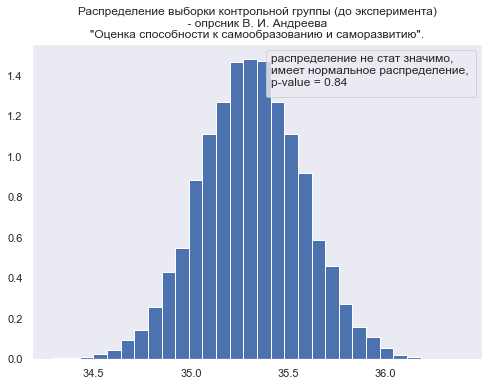

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


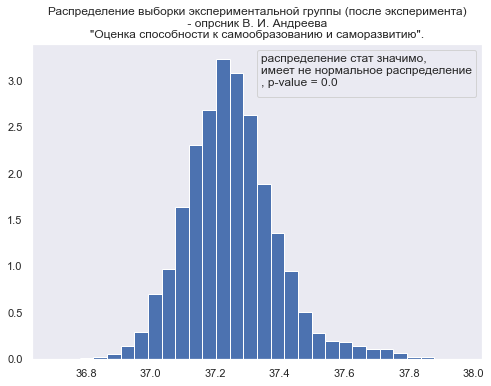

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


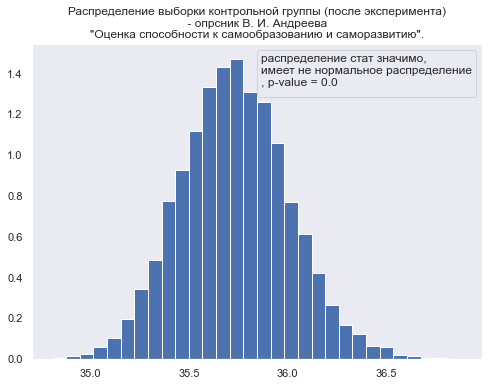

In [105]:
# check normal or not distribution. We use 1000 times extrac random data from our distribution
# plot mean of distribution and calculate shapiro stat
%pylab inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import scipy.stats

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def check_normal_or_not_distribution(list_, name_dist):
    population = pd.DataFrame(list_, columns = ['data'])
    sample_means_control = []
    for i in range(10000):
        sample_control = population.data.sample(frac=10, replace=True).tolist()
        sample_control = reject_outliers(np.array(sample_control), m=2)
        sample_means_control.append(np.mean(sample_control))

    sp = stats.shapiro(sample_means_control)
    concl = f'распределение не стат значимо, \nимеет нормальное распределение, \np-value = {round(sp[1], 2)}' if sp[1]>0.05 else f'распределение стат значимо, \nимеет не нормальное распределение\n, p-value = {round(sp[1], 2)}'
    
    # Plot the population
    plt.figure(figsize=(7, 5))
    # включаем основную сетку
    plt.grid(which='major')
    # включаем дополнительную сетку
    plt.grid(which='minor', linestyle=':')
    plt.tight_layout()
    count, bins, ignored = plt.hist(sample_means_control, 30, density=True) # density=True # normed=False
    plt.title(f'Распределение {name_dist}')
    legend = pylab.legend()
    legend.set_title(concl)
    plt.show()

check_normal_or_not_distribution(all_ped, 'выборки экспериментальной группы (до эксперимента)\n - опрсник В. И. Андреева \n"Оценка способности к самообразованию и саморазвитию".')
check_normal_or_not_distribution(all_psy, 'выборки контрольной группы (до эксперимента)\n - опрсник В. И. Андреева \n"Оценка способности к самообразованию и саморазвитию".') 

check_normal_or_not_distribution(all_ped_fin, 'выборки экспериментальной группы (после эксперимента)\n - опрсник В. И. Андреева \n"Оценка способности к самообразованию и саморазвитию".')
check_normal_or_not_distribution(all_psy_fin, 'выборки контрольной группы (после эксперимента)\n - опрсник В. И. Андреева \n"Оценка способности к самообразованию и саморазвитию".') 

In [106]:
# Проверка данных на нормальность по описательной статистике
def stat_metrics(all_psy, all_ped):
    avrg = np.mean(all_psy)
    moda = stats.mode(all_psy)
    mediana = np.median(all_psy)
    std = np.std(all_psy)
    axes = stats.kurtosis(all_psy, axis=0, bias=True)
    skewness = stats.skew(all_psy, axis=0, bias=True)
    dict_ = {'Описательная статистика контрольная группа':{
        'Среднее значение':avrg,
        'Мода':moda[0][0],
        'Медиана':mediana,
        'Стандартное отклонение':std,
        'Эксцес':axes,
        'Асимметрия':skewness}
    }

    avrg1 = np.mean(all_ped)
    moda1 = stats.mode(all_ped)
    mediana1 = np.median(all_ped)
    std1 = np.std(all_ped)
    axes1 = stats.kurtosis(all_ped, axis=0, bias=True)
    skewness1 = stats.skew(all_ped, axis=0, bias=True)
    dict_1 = {'Описательная статистика экспериментальная группа':
        {'Среднее значение':avrg1,
        'Мода':moda1[0][0],
        'Медиана':mediana1,
        'Стандартное отклонение':std1,
        'Эксцес':axes1,
        'Асимметрия':skewness1}
    }
    df_ = pd.DataFrame.from_dict(dict_, orient = 'index')
    df_1 =  pd.DataFrame.from_dict(dict_1,  orient = 'index')
    df_all = pd.concat([df_, df_1])
    return df_all
print('------> Statistic metrics for test Andreev ------->')
df_stat_metrics = stat_metrics(all_psy, all_ped)
df_stat_metrics

------> Statistic metrics for test Andreev ------->


,Среднее значение,Мода,Медиана,Стандартное отклонение,Эксцес,Асимметрия
Описательная статистика контрольная группа,34.675000,31,34.0,6.482235,3.283816,-0.997769
Описательная статистика экспериментальная группа,34.078947,39,34.5,5.425969,0.278739,-0.042170


In [107]:
from scipy.stats import shapiro # Шапиро-Уилка
from scipy.stats import normaltest # Д’Агостино
# принимаем гипотезу Н0 - при которой данные распределены нормальным образом, если р > 0.05
# принимаем гипотезу Н1 - при которой данные распределены не нормальным образом, если р < 0.05
def check_normal_destr(all_ped, all_psy):
    stat, p = shapiro(all_ped)
    stat1, p1 = normaltest(all_ped)

    stat_, p_ = shapiro(all_psy)
    stat_1, p_1 = normaltest(all_psy)

    dict_stat = {'Шапиро-Уилка':{"statistic эксп. группа":stat, 'pvalue эксп. группа':p},
                "Д’Агостино":{"statistic эксп. группа":stat1, 'pvalue эксп. группа':p1}}

    dict_stat_ = {'Шапиро-Уилка':{"statistic контр. группа":stat_, 'pvalue контр. группа':p_},
                "Д’Агостино":{"statistic контр. группа":stat_1, 'pvalue контр. группа':p_1}}

    df_stat = pd.DataFrame.from_dict(dict_stat, orient = 'index')
    df_stat_ = pd.DataFrame.from_dict(dict_stat_, orient = 'index')
    df_all = pd.concat([df_stat, df_stat_], axis=1)
    df_all #  Вывод - данные у контрольной группы распределены не нормальным образом. У экспериментальной группы - нормальным образом
    return df_all
print('-----> Check normal or not data from two groups -----> ')
print('Вывод - данные у контрольной группы распределены не нормальным образом. \nУ экспериментальной группы - нормальным образом')
df_ckeck_normal_dist = check_normal_destr(all_ped, all_psy)
df_ckeck_normal_dist

-----> Check normal or not data from two groups -----> 
Вывод - данные у контрольной группы распределены не нормальным образом. 
У экспериментальной группы - нормальным образом


,statistic эксп. группа,pvalue эксп. группа,statistic контр. группа,pvalue контр. группа
Шапиро-Уилка,0.965642,0.287901,0.895668,0.001434
Д’Агостино,0.731760,0.693586,15.366387,0.000461


#  Используем критерий Манна-Уитни для сравнение выборок контрольной и экспериментальной групп до эксперимента (компонент Самоорганизация и самоуправление самообразовательной деятельностью)
>Строим гипотезу: Н0 - группы не отличаются друг от друга при p-value > 0.5
>
>
>Строим гипотезу: Н1 - группы не отличаются друг от друга при p-value < 0.5

In [108]:
stat, p = stats.mannwhitneyu(all_psy, all_ped, alternative='two-sided') #  two-sided
print('p-value ---> more than 0.5 it means data distribution are difference -----> ', p)

p-value ---> more than 0.5 it means data distribution are difference ----->  0.6198210676613852


In [109]:
# plot dataset
df = pd.DataFrame.from_dict(['Все данные', stat, p]).T
df = df.rename(columns = {0:'Критерий', 1:'Статистический критерий', 2:'p-value'})
df['Вывод'] = df['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df['Методика']= 'Тест В. И. Андреева'
df_andr_before = df
df_andr_before

,Критерий,Статистический критерий,p-value,Вывод,Методика
0,Все данные,810.0,0.619821,Принимаем нулевую гипотезу: выборки одинаковы,Тест В. И. Андреева


# Проверяем гипотезу о том, что c вероятностью 95% данные контрольной и экспериментальной групп (компонент Самоорганизация и самоуправление самообразовательной деятельностью) различны при помощи критерия Стьюдента и критерия Манна-Уитни

In [110]:
# t-test two-side
stat1, p1 = stats.ttest_ind(all_ped_fin, all_psy_fin) 
print(f'Можно сделать вывод, что сравнение средних значений (экспериментальной группы) \nиз выборки доэкспериментальных результатов и результатов после эксперимента \nсущественно отличаются друг от друга при t = {stat1} и p-value = {p1}')
df = pd.DataFrame.from_dict(['Все данные', stat1, p1]).T
df = df.rename(columns = {0:'Критерий', 1:'Статистический критерий', 2:'p-value'})
df['Вывод'] = df['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df['Методика']= 'Тест В. И. Андреева'
df_andr = df
df_andr



Можно сделать вывод, что сравнение средних значений (экспериментальной группы) 
из выборки доэкспериментальных результатов и результатов после эксперимента 
существенно отличаются друг от друга при t = 2.1198578402476667 и p-value = 0.037282391381326746


,Критерий,Статистический критерий,p-value,Вывод,Методика
0,Все данные,2.119858,0.037282,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Тест В. И. Андреева


In [111]:
# u-test mannwhitneyu two-side
stat, p = stats.mannwhitneyu(all_ped_fin, all_psy_fin, alternative='two-sided')
print(f'Можно сделать вывод, что сравнение средних значений (экспериментальной группы) \nиз выборки доэкспериментальных результатов и результатов после эксперимента \nсущественно отличаются друг от друга при t = {stat} и p-value = {p}')


Можно сделать вывод, что сравнение средних значений (экспериментальной группы) 
из выборки доэкспериментальных результатов и результатов после эксперимента 
существенно отличаются друг от друга при t = 1000.0 и p-value = 0.016303402735774134


---->   контрольная группа ---- >


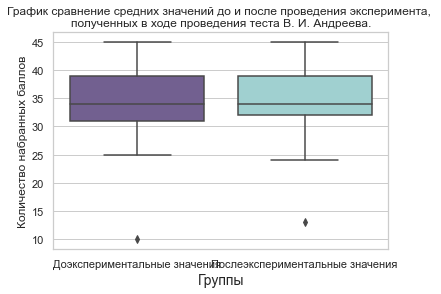

In [112]:
def plot_diff(all_ped, all_ped_fin):
    sns.set_theme(style="whitegrid")
    data = [all_ped, all_ped_fin]
    df = pd.DataFrame(data)
    df = df.T
    df = df.rename(columns = {0:'Доэкспериментальные значения', 1:'Послеэкспериментальные значения'})
    colors = ['#705898', '#98D8D8']
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df), palette=colors)
    ax.axes.set_title('График сравнение средних значений до и после проведения эксперимента, \nполученных в ходе проведения теста В. И. Андреева.', fontsize=12)
    ax.set_xlabel("Группы", fontsize=14)
    ax.set_ylabel("Количество набранных баллов", fontsize=12)
    sns.set(rc={'figure.figsize':(7,5)})

print('---->   контрольная группа ---- >')
plot_diff(all_psy, all_psy_fin)

---->   экспериментальная группа ---- >


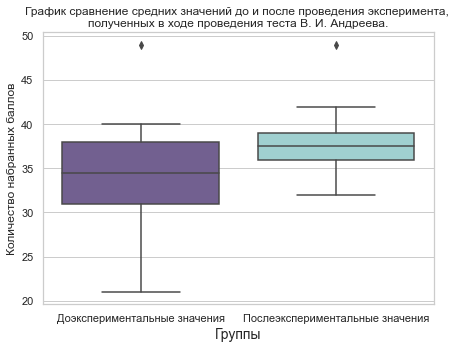

In [113]:
print('---->   экспериментальная группа ---- >')
plot_diff(all_ped, all_ped_fin)

---->   контрольная и экспериментальная группы ---- >


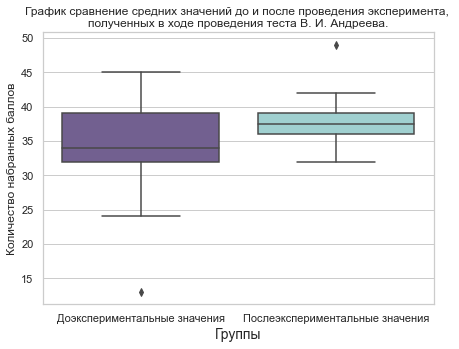

In [114]:
print('---->   контрольная и экспериментальная группы ---- >')
plot_diff(all_psy_fin, all_ped_fin)

# Мотивационный компонент самообразовательной деятельности
    -Методика И. С. Домбровской

In [115]:
# data before experiment
mot_ped_3 = [[3.9, 3.8, 2.9, 3.7, 2.8, 2.0, 3.0, 2.0, 2.0, 3.2, 2.8, 2.0, 3.8, 3.6, 3.5, 2.2, 3.0, 2.4], [3.4, 3.1, 1.2, 2.0, 1.6, 1.8, 2.5, 2.6, 1.8, 3.2, 2.6, 1.2, 3.5, 3.0, 3.4, 3.6, 4.0, 2.4], [3.2, 3.3, 2.3, 1.8, 3.1, 3.0, 2.6, 3.1, 2.3, 3.1, 3.0, 2.8, 3.2, 3.0, 3.2, 3.1, 4.0, 3.1], [4.0, 3.4, 2.4, 3.2, 3.8, 2.8, 2.4, 2.8, 2.8, 2.8, 3.4, 1.8, 3.2, 2.6, 4.0, 4.0, 4.0, 2.8], [4.0, 3.8, 2.4, 2.4, 3.2, 2.2, 2.8, 2.0, 2.6, 3.2, 2.0, 2.4, 3.6, 2.2, 4.0, 4.0, 4.0, 3.4], [4.0, 4.0, 2.0, 2.4, 3.2, 2.4, 3.0, 2.2, 2.2, 3.0, 1.8, 2.2, 3.6, 3.0, 4.0, 4.0, 4.0, 3.0]]
mot_ped_1 = [[3.0, 3.6, 2.6, 2.4, 3.0, 2.8, 3.0, 1.6, 2.8, 2.4, 1.8, 3.0, 1.8, 3.0, 2.4, 2.2, 3.0, 2.8, 2.4, 3.4, 3.2], [3.4, 3.4, 2.8, 2.6, 2.2, 3.0, 2.2, 2.4, 3.2, 2.2, 1.6, 2.2, 1.6, 3.0, 2.6, 2.0, 2.8, 4.0, 2.8, 3.2, 3.6], [3.8, 3.0, 3.2, 3.2, 2.8, 3.4, 2.8, 2.2, 3.2, 3.4, 2.8, 2.8, 2.8, 2.2, 3.2, 2.8, 3.6, 3.0, 3.6, 3.0, 3.8], [3.2, 3.8, 4.0, 3.0, 3.2, 3.4, 3.2, 3.2, 2.8, 3.2, 3.8, 3.2, 3.8, 3.2, 3.0, 3.0, 2.8, 3.0, 2.8, 2.8, 3.2], [3.0, 3.2, 3.8, 3.2, 3.4, 2.6, 3.4, 3.0, 2.2, 3.0, 2.2, 3.4, 2.2, 3.0, 3.2, 2.2, 3.8, 4.0, 3.8, 3.4, 4.0], [3.4, 3.2, 2.8, 3.2, 3.0, 3.2, 3.0, 1.8, 2.2, 2.6, 3.0, 3.0, 2.8, 3.0, 3.2, 2.4, 3.0, 3.6, 3.0, 3.2, 3.8]]
mot_psy_3 = [[3.6, 4.0, 2.6, 2.8, 4.0, 3.0, 3.0, 2.8, 2.2, 2.4, 2.4, 3.6, 3.4,2.0, 2.8, 3.4, 2.6], [3.6, 4.0, 3.0, 3.0, 3.6, 3.0, 2.8, 2.8, 1.4, 2.4, 1.8, 4.0, 3.6, 2.2, 2.6, 3.2, 2.8], [3.2, 3.2, 3.3, 3.8, 3.4, 3.2, 2.8, 3.6, 3.0, 3.2, 2.8, 3.0, 3.5, 2.4, 3.8, 3.6, 3.0], [3.6, 4.0, 3.0, 3.4, 3.4, 2.8, 3.4, 3.6, 2.8, 2.8, 2.8, 3.6, 3.2, 2.8, 2.6, 3.0, 2.2], [3.8, 4.0, 3.4, 3.0, 4.0, 2.0, 2.2, 3.4, 2.8, 3.0, 3.2, 3.2, 3.4, 2.6, 3.4, 2.8, 2.8], [3.8, 4.0, 3.2, 3.2, 3.8, 2.8, 2.0, 2.8, 3.4, 2.8, 3.0, 3.6, 3.2, 2.8, 3.0, 3.0, 2.8]]
mot_psy_1 = [[3.2, 3.4, 3.2, 3.0, 3.0, 2.0, 2.8, 3.6, 3.0, 2.8, 2.8, 1.2, 3.2, 2.6, 2.6, 3.6, 3.2, 3.0, 2.6, 4.0, 3.2], [3.0, 3.4, 2.6, 3.0, 3.0, 2.2, 3.2, 3.6, 3.4, 2.8, 2.2, 2.2, 3.2, 1.8, 2.8, 3.2, 3.2, 2.8, 3.0, 3.8, 2.8], [3.0, 3.1, 3.2, 3.4, 3.2, 3.2, 3.2, 3.6, 3.8, 2.8, 3.8, 1.8, 3.4, 1.6, 3.8, 3.0, 3.0, 3.6, 3.2, 3.0, 3.4], [2.8, 3.4, 2.4, 2.2, 3.0, 3.0, 2.8, 3.6, 2.4, 3.2, 3.4, 2.6, 2.6, 1.6, 2.6, 2.2, 3.0, 3.4, 2.6, 3.6, 3.2], [3.6, 3.4, 2.4, 2.8, 3.2, 2.6, 2.2, 3.4, 2.6, 2.2, 2.8, 2.0, 2.0, 2.0, 2.6, 3.2, 1.8, 3.2, 3.0, 3.6, 3.2], [3.2, 3.8, 2.4, 2.4, 3.6, 2.8, 2.2, 3.2, 2.0, 2.8, 3.2, 2.6, 3.2, 2.4, 3.0, 2.6, 3.2, 2.6, 2.4, 4.0, 3.2]]

In [116]:
for i in range (len(mot_ped_1)):
    for j in mot_ped_1[i]:
        mot_ped_3[i].append(j)
for i in range (len(mot_psy_1)):
    for j in mot_psy_1[i]:
        mot_psy_3[i].append(j) 
        
mot_ped_all = mot_ped_3
mot_psy_all = mot_psy_3

In [117]:
# Данные полученные после эксперимента

mot_ped_all_fin_ = [[4.3, 4.2, 3.2, 4.1, 3.1, 2.5, 3.3, 2.2, 2.3, 3.4, 3.1, 2.5, 4.3, 3.9, 3.9, 2.5, 3.5, 2.6, 3.3, 3.9, 2.8, 2.7, 3.4, 3.0, 3.4, 1.9, 3.3, 2.8, 2.0, 3.2, 2.2, 3.2, 2.8, 2.6, 3.3, 3.3, 2.7, 3.6, 3.4], [3.6, 3.4, 1.6, 2.4, 1.8, 2.1, 2.8, 3.0, 2.3, 3.6, 2.9, 1.6, 3.8, 3.3, 3.6, 4.0, 4.5, 2.6, 3.8, 3.9, 3.0, 3.1, 2.6, 3.3, 2.5, 2.9, 3.5, 2.6, 2.1, 2.6, 1.9, 3.3, 3.0, 2.2, 3.1, 4.3, 3.2, 3.5, 4.0], [3.5, 3.5, 2.5, 2.3, 3.4, 3.5, 3.0, 3.4, 2.6, 3.5, 3.2, 3.0, 3.7, 3.3, 3.5, 3.6, 4.4, 3.4, 4.1, 3.5, 3.6, 3.5, 3.2, 3.9, 3.2, 2.4, 3.4, 3.6, 3.2, 3.2, 3.1, 2.4, 3.6, 3.1, 4.0, 3.3, 3.9, 3.3, 4.0], [4.3, 3.7, 2.8, 3.5, 4.1, 3.1, 2.7, 3.0, 3.1, 3.2, 3.8, 2.2, 3.7, 3.1, 4.3, 4.3, 4.5, 3.1, 3.4, 4.1, 4.3, 3.4, 3.6, 3.6, 3.5, 3.6, 3.1, 3.4, 4.1, 3.5, 4.0, 3.6, 3.4, 3.3, 3.2, 3.5, 3.0, 3.2, 3.5], [4.4, 4.2, 2.9, 2.7, 3.7, 2.5, 3.1, 2.3, 3.0, 3.4, 2.2, 2.7, 3.9, 2.7, 4.4, 4.4, 4.5, 3.8, 3.5, 3.6, 4.2, 3.6, 3.6, 2.8, 3.8, 3.4, 2.4, 3.4, 2.6, 3.7, 2.7, 3.3, 3.4, 2.5, 4.2, 4.4, 4.2, 3.8, 4.4], [4.3, 4.2, 2.3, 2.7, 3.4, 2.8, 3.4, 2.5, 2.4, 3.2, 2.2, 2.5, 4.0, 3.2, 4.5, 4.2, 4.5, 3.4, 3.8, 3.5, 3.2, 3.7, 3.3, 3.6, 3.4, 2.1, 2.5, 3.0, 3.3, 3.3, 3.1, 3.2, 3.7, 2.7, 3.3, 4.0, 3.2, 3.7, 4.1]]
mot_psy_all_fin_ = [[4.7, 4.6, 3.7, 4.4, 3.6, 2.9, 3.9, 2.7, 2.8, 3.9, 3.6, 2.9, 4.6, 4.5, 4.2, 2.9, 3.9, 3.0, 3.8, 4.2, 3.3, 3.0, 3.7, 3.5, 3.8, 2.3, 3.8, 3.2, 2.6, 3.5, 2.5, 3.5, 3.2, 3.1, 3.9, 3.7, 3.1, 3.9, 3.8], [4.1, 3.8, 2.2, 2.9, 2.3, 2.5, 3.2, 3.4, 2.7, 4.1, 3.3, 1.9, 4.1, 3.8, 4.2, 4.4, 4.8, 3.0, 4.2, 4.4, 3.4, 3.6, 3.2, 3.6, 2.8, 3.5, 3.9, 3.1, 2.6, 3.0, 2.2, 3.7, 3.3, 2.6, 3.6, 4.6, 3.7, 3.8, 4.6], [3.8, 3.9, 2.9, 2.6, 4.0, 4.1, 3.4, 3.9, 3.2, 4.0, 3.8, 3.5, 4.2, 3.7, 4.1, 4.1, 4.9, 4.0, 4.5, 3.9, 3.9, 4.1, 3.7, 4.3, 3.5, 2.7, 3.9, 4.0, 3.6, 3.7, 3.7, 2.9, 4.2, 3.7, 4.4, 3.7, 4.5, 3.6, 4.6], [4.8, 4.3, 3.2, 3.9, 4.6, 3.4, 3.2, 3.5, 3.7, 3.8, 4.2, 2.7, 4.2, 3.6, 4.9, 4.9, 5.1, 3.7, 4.0, 4.5, 4.8, 3.7, 4.0, 4.1, 4.1, 4.2, 3.6, 3.8, 4.5, 4.0, 4.3, 4.2, 3.9, 3.8, 3.7, 3.9, 3.5, 3.7, 3.8], [5.0, 4.6, 3.4, 3.2, 4.3, 2.9, 3.4, 2.8, 3.3, 3.9, 2.6, 3.1, 4.3, 3.1, 4.9, 4.8, 4.9, 4.3, 4.1, 4.0, 4.7, 3.9, 3.9, 3.1, 4.4, 3.8, 3.0, 3.8, 3.0, 4.0, 3.3, 3.8, 3.7, 3.1, 4.5, 4.9, 4.8, 4.3, 4.8], [4.8, 4.6, 2.8, 3.1, 3.9, 3.3, 3.9, 2.9, 2.9, 3.6, 2.6, 2.8, 4.4, 3.7, 5.1, 4.6, 5.1, 3.8, 4.3, 3.9, 3.6, 4.2, 3.9, 4.0, 4.0, 2.5, 3.0, 3.5, 3.8, 3.9, 3.4, 3.5, 4.3, 3.1, 3.8, 4.4, 3.7, 4.2, 4.7]]




In [118]:
def check_normal_or_not_distribution_motiv(list_, name):
    sample_means_control1 = []
    sample_means_control2 = []
    sample_means_control3 = []
    sample_means_control4 = []
    sample_means_control5 = []
    sample_means_control6 = []
    for dat in range(len(list_)):
        if dat == 0:
            population = pd.DataFrame(list_[dat], columns = ['data'])
            for i in range(1000):
                sample_control = population.data.sample(frac=1, replace=True).tolist()
                sample_means_control1.append(np.mean(sample_control))
                
        if dat == 1:
            population = pd.DataFrame(list_[dat], columns = ['data'])
            for i in range(1000):
                sample_control = population.data.sample(frac=1, replace=True).tolist()
                sample_means_control2.append(np.mean(sample_control))
                
        if dat == 2:
            population = pd.DataFrame(list_[dat], columns = ['data'])
            for i in range(1000):
                sample_control = population.data.sample(frac=1, replace=True).tolist()
                sample_means_control3.append(np.mean(sample_control))
                
        if dat == 3:
            population = pd.DataFrame(list_[dat], columns = ['data'])
            for i in range(1000):
                sample_control = population.data.sample(frac=1, replace=True).tolist()
                sample_means_control4.append(np.mean(sample_control))
                
        if dat == 4:
            population = pd.DataFrame(list_[dat], columns = ['data'])
            for i in range(1000):
                sample_control = population.data.sample(frac=1, replace=True).tolist()
                sample_means_control5.append(np.mean(sample_control))
                
        if dat == 5:
            population = pd.DataFrame(list_[dat], columns = ['data'])
            for i in range(1000):
                sample_control = population.data.sample(frac=1, replace=True).tolist()
                sample_means_control6.append(np.mean(sample_control))

    
    sp = stats.shapiro(sample_means_control1)
    concl1 = f'Широкие познавательные мотивы\nнормальное распределение, \np-value = {sp[1]}' if sp[1]>0.05 else f'Широкие познавательные мотивы\nне нормальное распределение, \np-value = {sp[1]}'
    
    sp = stats.shapiro(sample_means_control2)
    concl2 = f'Учебно-познавательные мотивы\n нормальное распределение, \np-value = {sp[1]}' if sp[1]>0.05 else f'Учебно-познавательные мотивы\nне нормальное распределение, \np-value = {sp[1]}'
    
    sp = stats.shapiro(sample_means_control3)
    concl3 = f'Мотивы самообразования\nМотивы самообразования\nимеет нормальное распределение, \np-value = {sp[1]}' if sp[1]>0.05 else f'Мотивы самообразования\n не нормальное распределение, \np-value = {sp[1]}'
    
    sp = stats.shapiro(sample_means_control4)
    concl4 = f'Широкие социальные мотивы\n нормальное распределение, \np-value = {sp[1]}' if sp[1]>0.05 else f'Широкие социальные мотивы\nне нормальное распределение, \np-value = {sp[1]}'
    
    sp = stats.shapiro(sample_means_control5)
    concl5 = f'Узкие социальные мотивы\nнормальное распределение, \np-value = {sp[1]}' if sp[1]>0.05 else f'Узкие социальные мотивы\nне нормальное распределение, \np-value = {sp[1]}'
    
    sp = stats.shapiro(sample_means_control6)
    concl6 = f'Социальные мотивы\nнормальное распределение, \np-value = {sp[1]}' if sp[1]>0.05 else f'Социальные мотивы\nне нормальное распределение, \np-value = {sp[1]}'
    
    figure, axis = plt.subplots(2, 3)
    figure.suptitle(f'{name} группа: методика «Мотивация учебной деятельности: уровни и типы» И. С. Домбровская', fontsize=30)
    figure.set_figheight(20)
    figure.set_figwidth(40)
    sns.distplot(sample_means_control1,color='red',label='bmi',ax=axis[0][0]).set_title(u'Широкие познавательные мотивы', fontsize=30)
    sns.distplot(sample_means_control2,color='red',label='bmi',ax=axis[0][1]).set_title(u'Учебно-познавательные мотивы', fontsize=30)
    sns.distplot(sample_means_control3,color='red',label='bmi',ax=axis[0][2]).set_title(u'Мотивы самообразования', fontsize=30)
    sns.distplot(sample_means_control4,color='red',label='bmi',ax=axis[1][0]).set_title(u'Широкие социальные мотивы', fontsize=30)
    sns.distplot(sample_means_control5,color='red',label='bmi',ax=axis[1][1]).set_title(u'Узкие социальные мотивы', fontsize=30)
    sns.distplot(sample_means_control6,color='red',label='bmi',ax=axis[1][2]).set_title(u'Социальные мотивы', fontsize=30)
    
    figure.legend(labels=[concl1, concl2, concl3], fontsize=20,  loc ='upper right')
    figure.legend(labels=[concl4, concl5, concl6], fontsize=20,  loc ='lower right')
    plt.show()

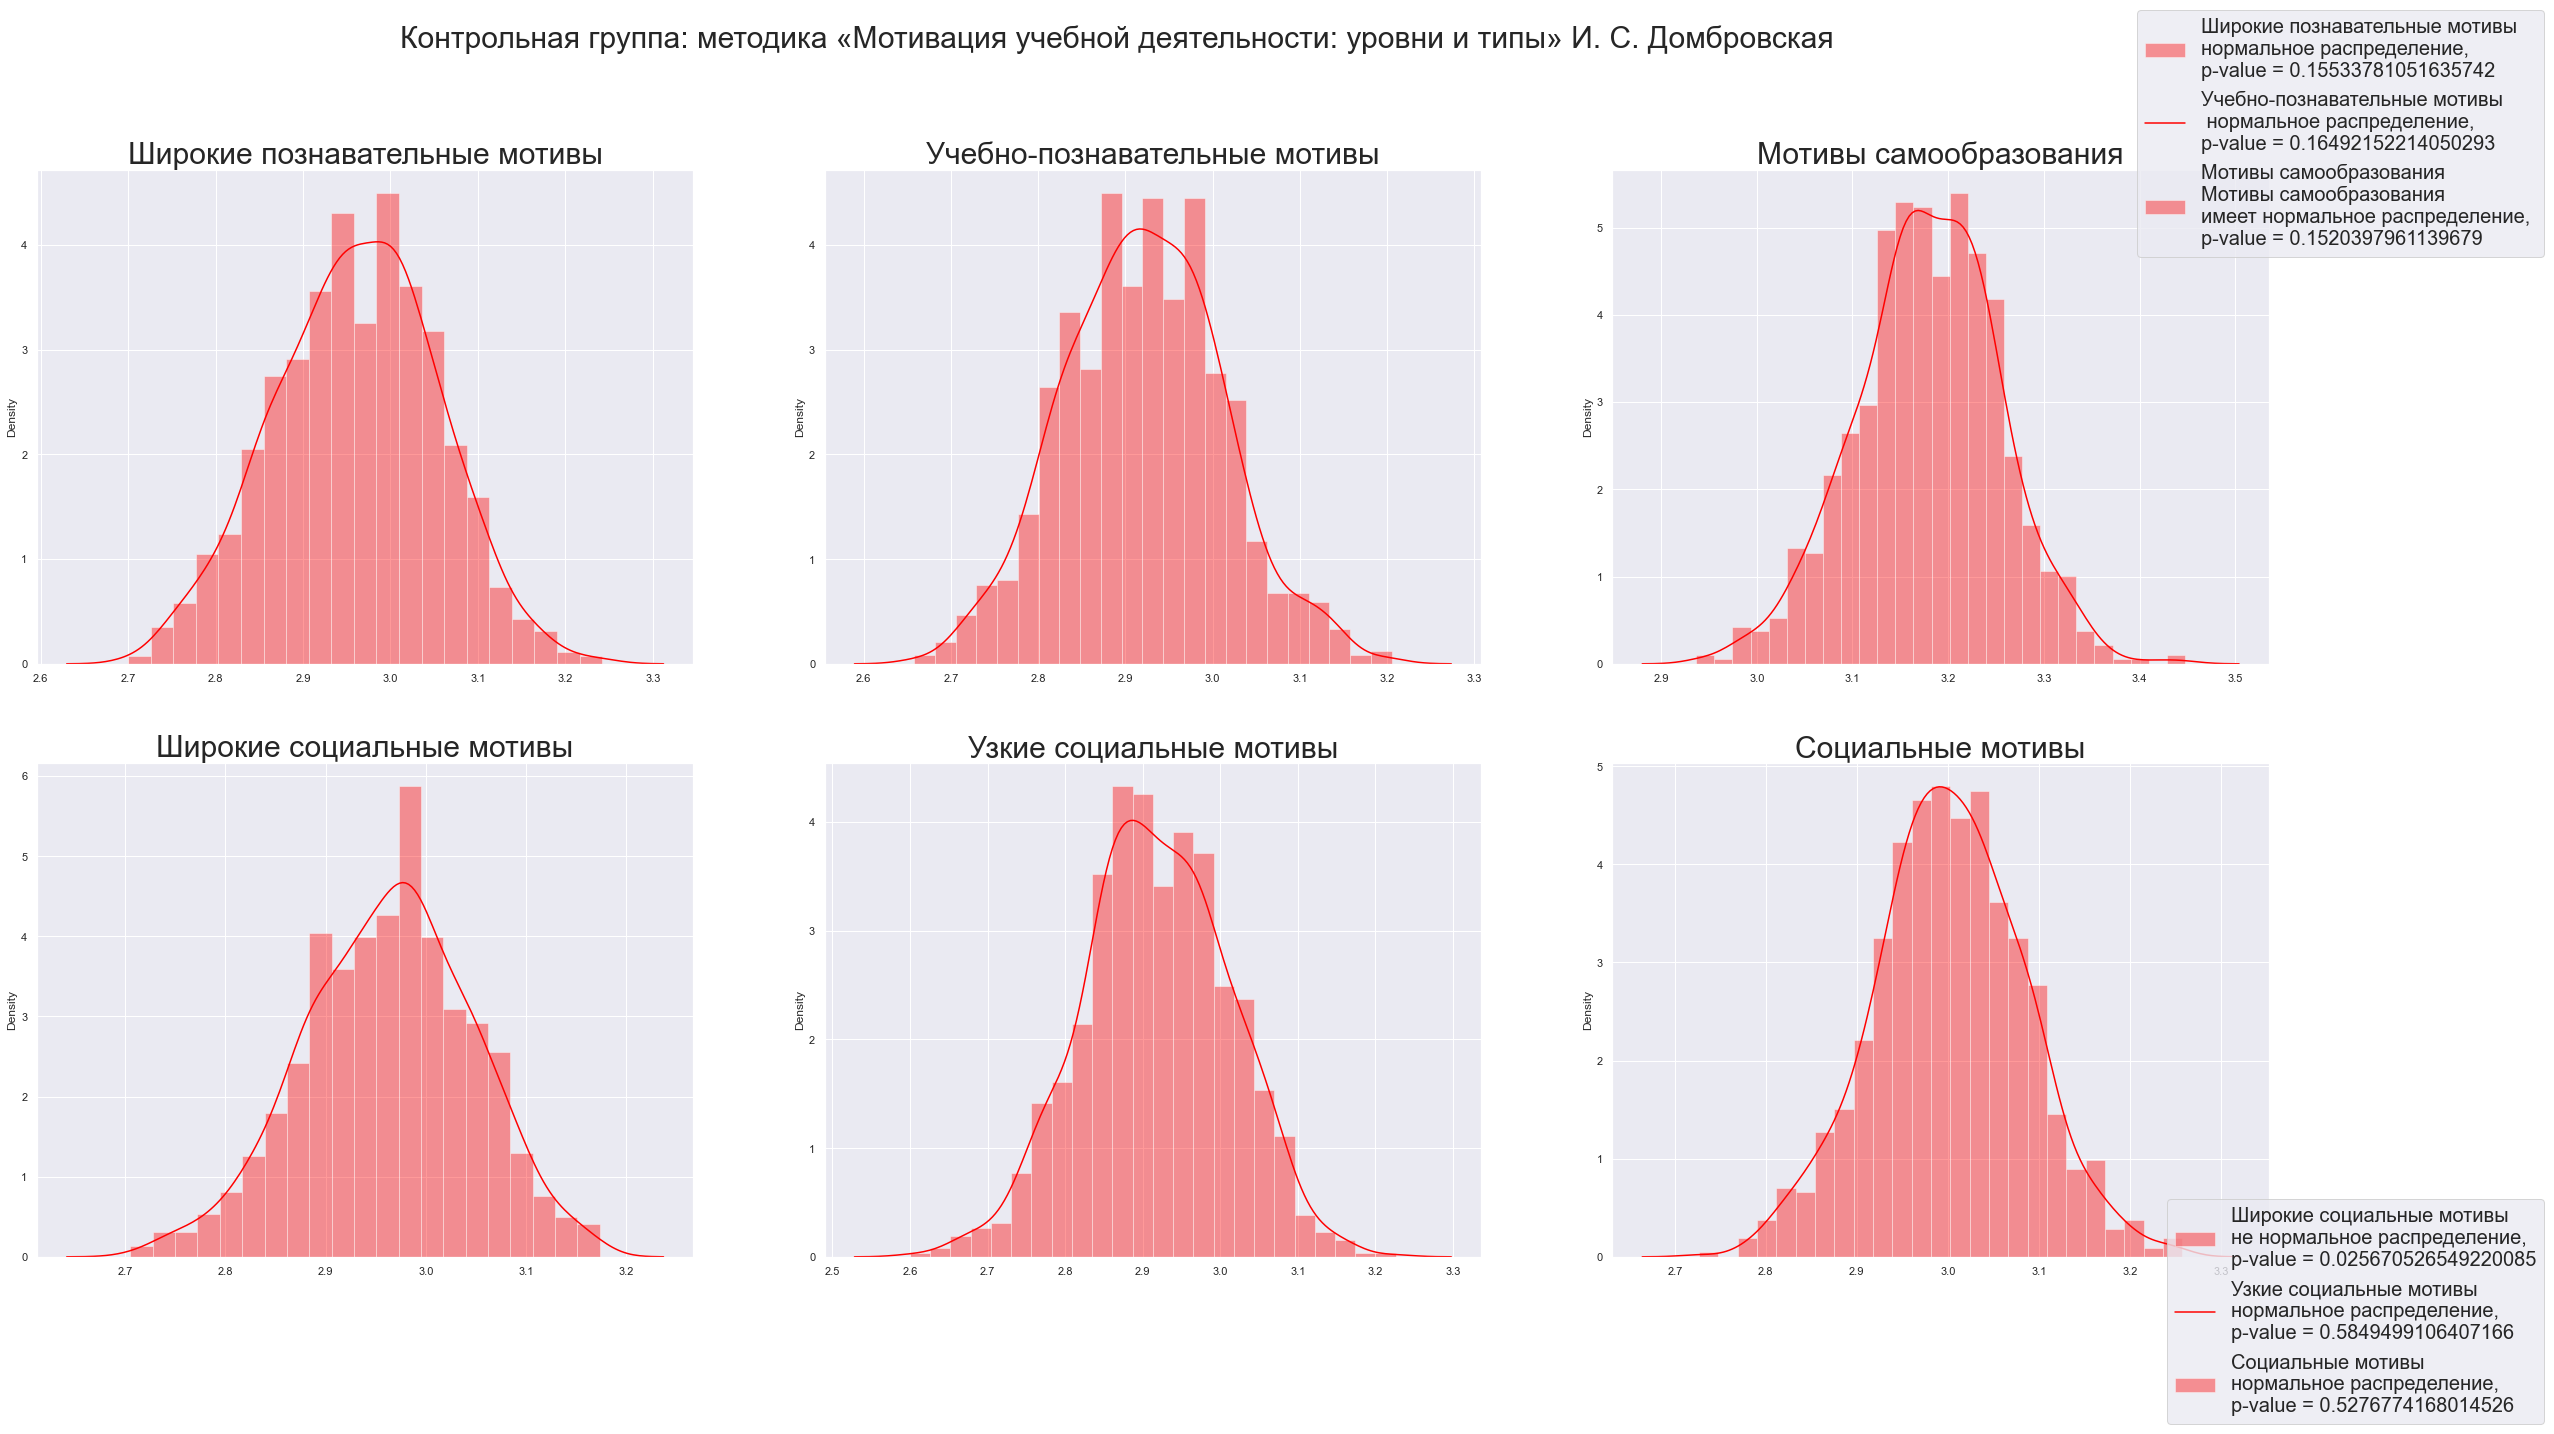

In [119]:
check_normal_or_not_distribution_motiv(mot_psy_all, 'Контрольная')

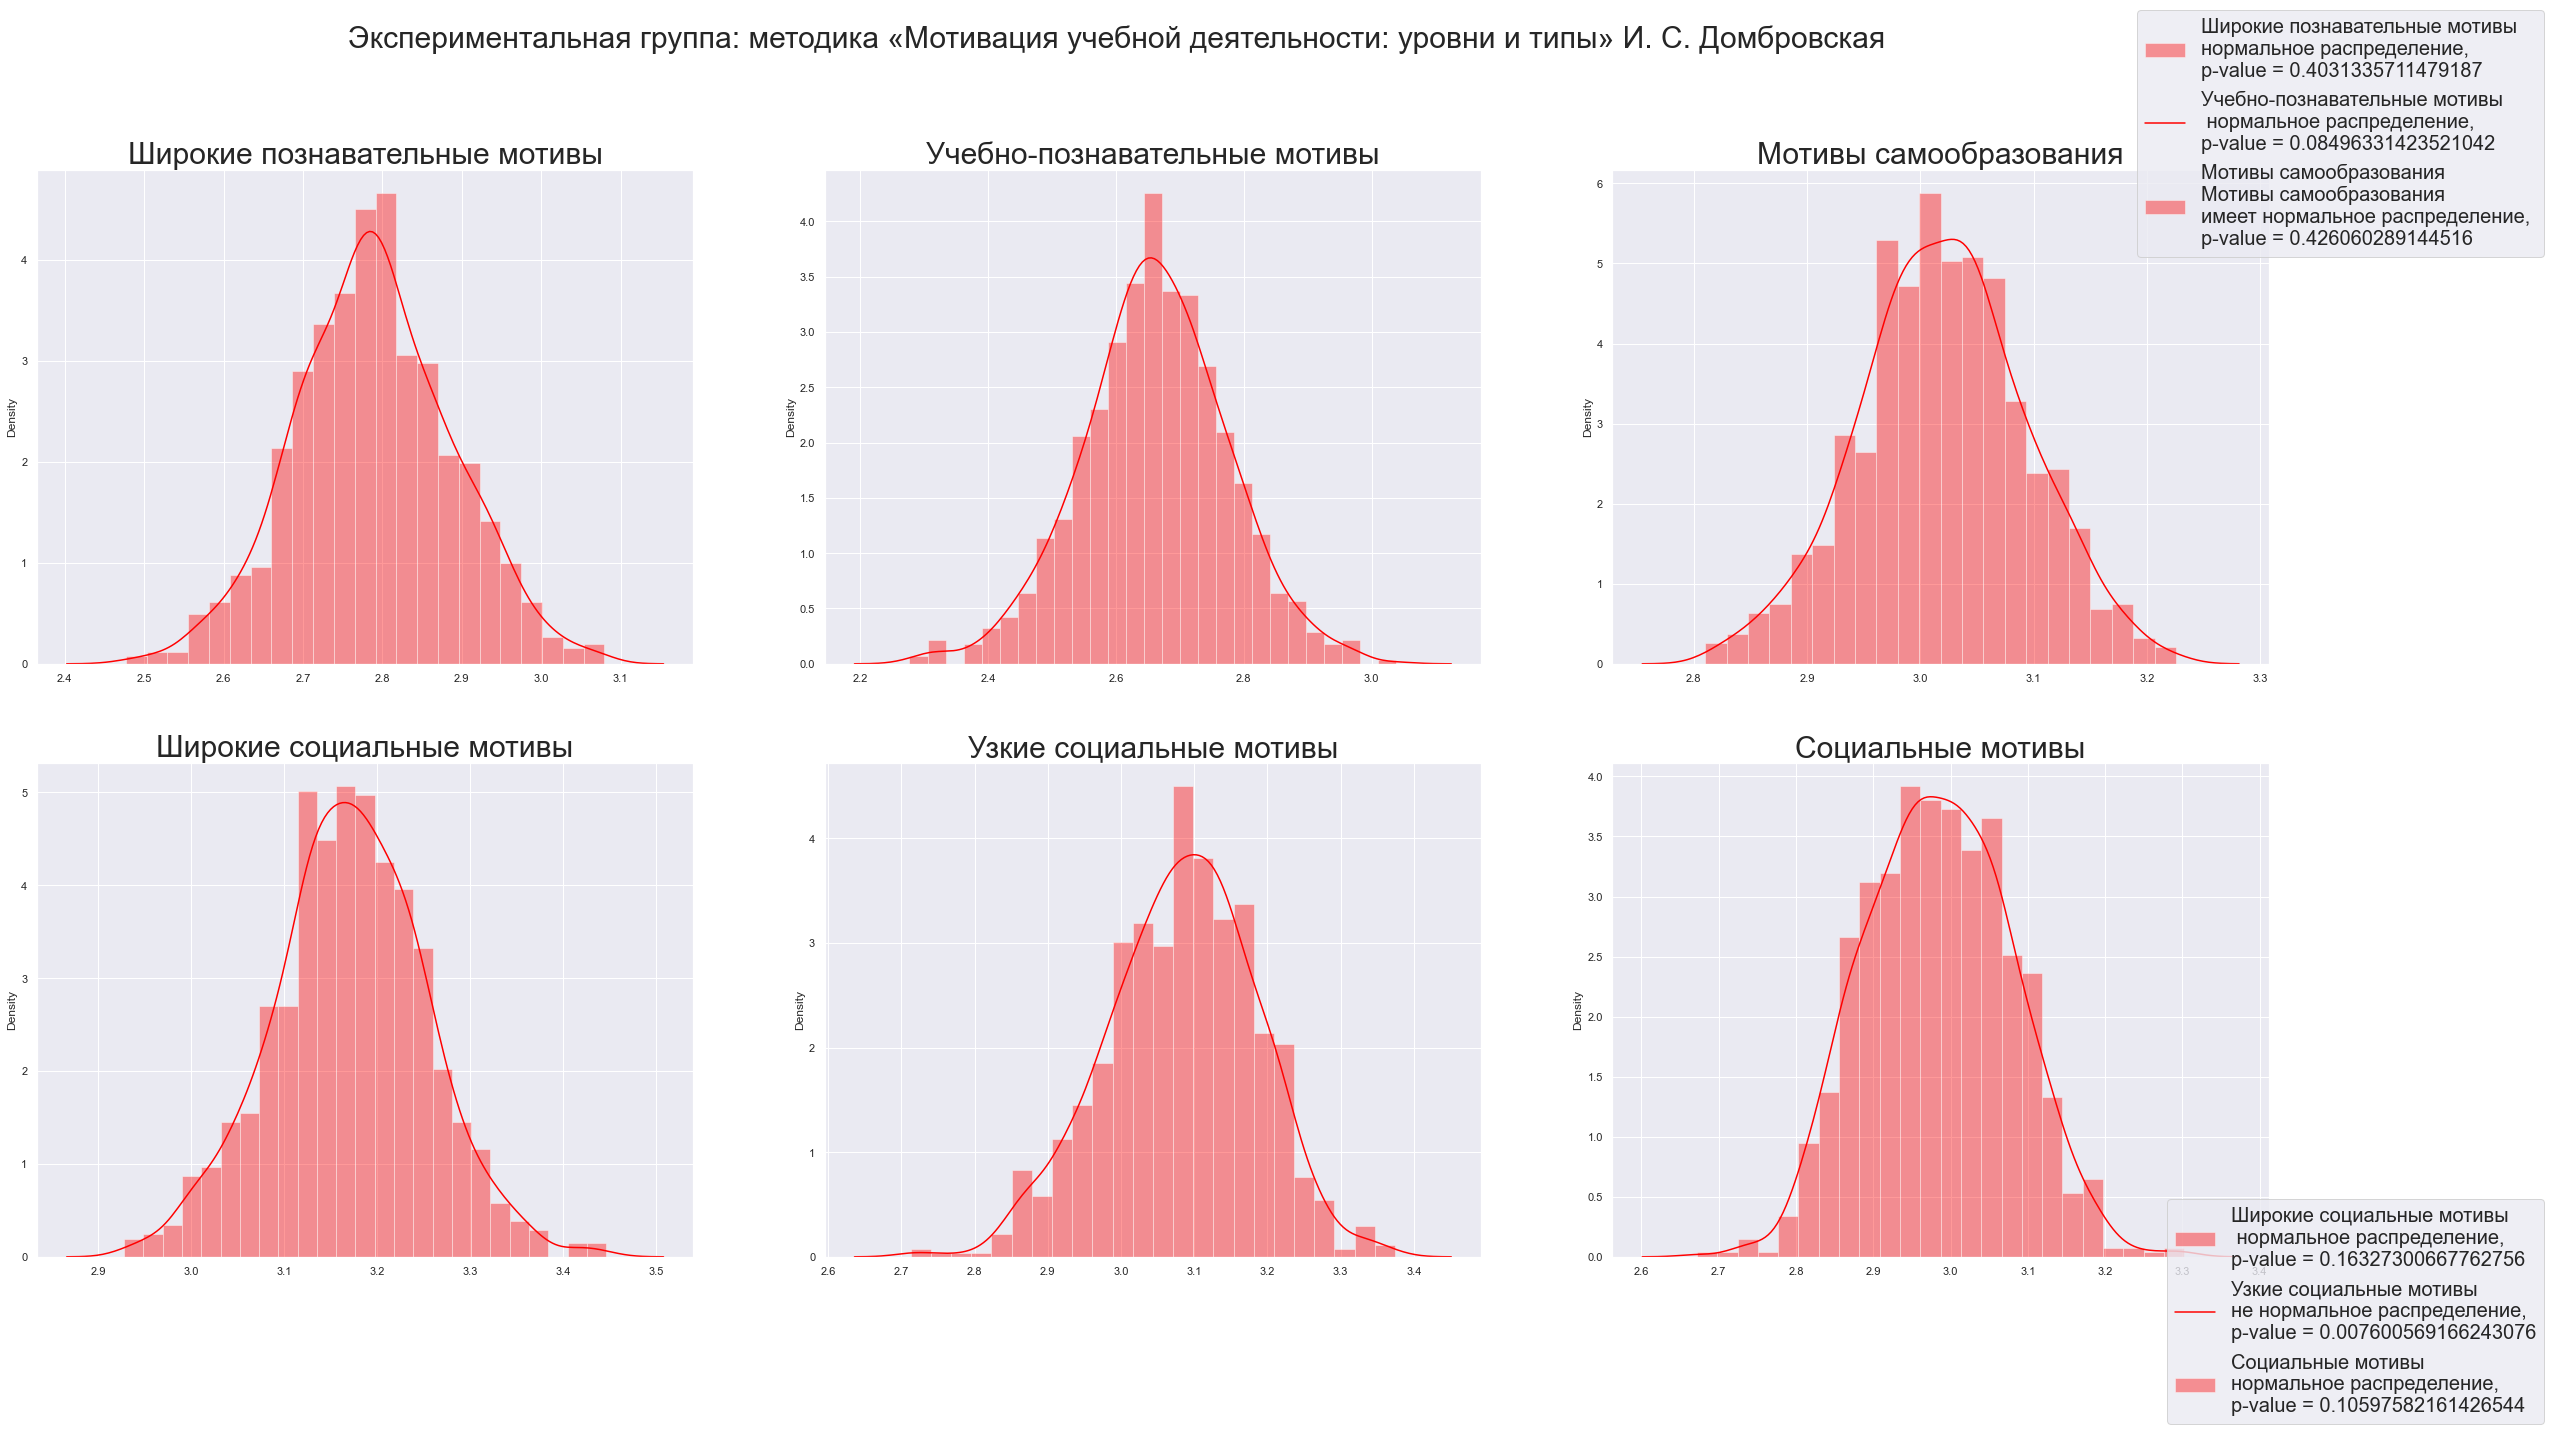

In [120]:
check_normal_or_not_distribution_motiv(mot_ped_all, 'Экспериментальная')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


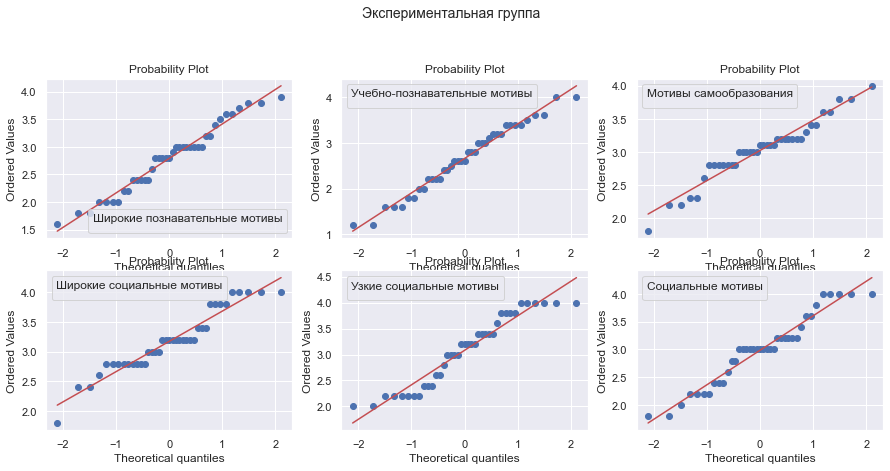

In [121]:
# Q-Q plot
def q_q_plot_mot(mot_ped_all, name):
    fig = plt.gcf()
    fig.suptitle(name, fontsize=14) # "Экспериментальная группа"
    fig.set_size_inches(15, 10)

    pylab.subplot (3, 3, 1)
    # for i in range(len(mot_ped_all)):
    stats.probplot(mot_ped_all[0], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Широкие познавательные мотивы')
    pylab.subplot (3, 3, 2)
    stats.probplot(mot_ped_all[1], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Учебно-познавательные мотивы')
    pylab.subplot (3, 3, 3)
    stats.probplot(mot_ped_all[2], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Мотивы самообразования')
    pylab.subplot (3, 3, 4)
    stats.probplot(mot_ped_all[3], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Широкие социальные мотивы')

    pylab.subplot (3, 3, 5)
    stats.probplot(mot_ped_all[4], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Узкие социальные мотивы')

    pylab.subplot (3, 3, 6)
    stats.probplot(mot_ped_all[5], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Социальные мотивы')

    pylab.draw()
    
q_q_plot_mot(mot_ped_all, "Экспериментальная группа")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


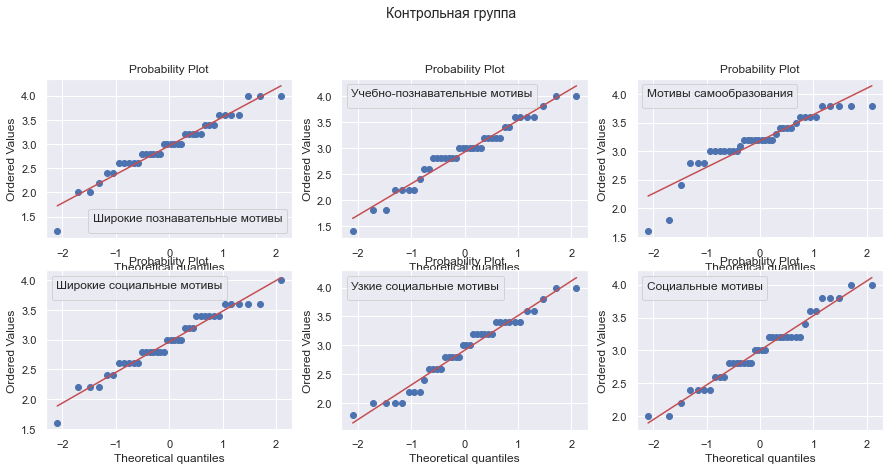

In [122]:
q_q_plot_mot(mot_psy_all, "Контрольная группа")

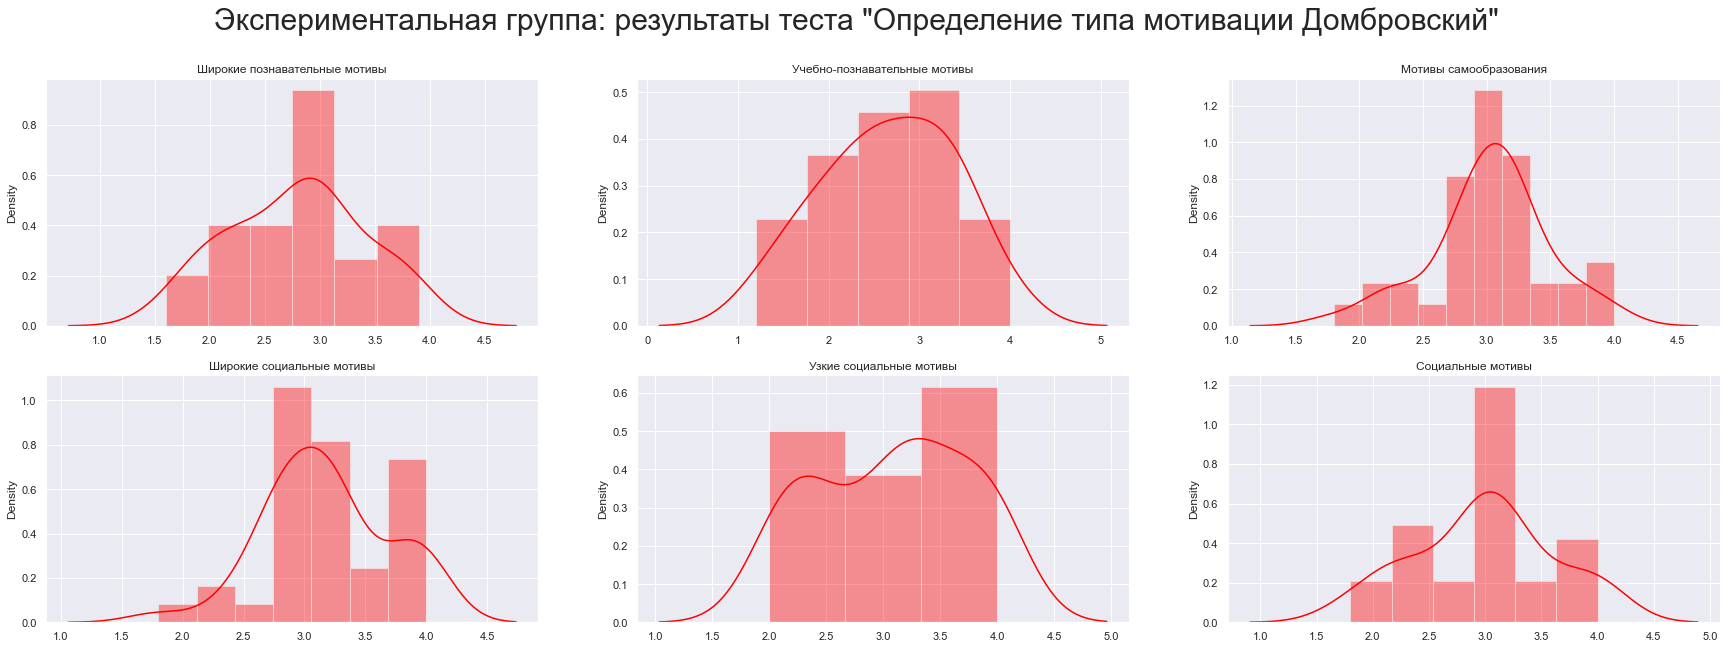

In [123]:
def gist_mot(mot_ped_all, name):
    figure, axis = plt.subplots(2, 3)
    figure.suptitle(f'{name}: результаты теста "Определение типа мотивации Домбровский"', fontsize=30)
    figure.set_figheight(10)
    figure.set_figwidth(30)    
    sns.distplot(mot_ped_all[0] ,color='red',label='bmi',ax=axis[0][0]).set_title(u'Широкие познавательные мотивы')
    sns.distplot(mot_ped_all[1],color='red',label='bmi',ax=axis[0][1]).set_title(u'Учебно-познавательные мотивы')
    sns.distplot(mot_ped_all[2] ,color='red',label='bmi',ax=axis[0][2]).set_title(u'Мотивы самообразования')
    sns.distplot(mot_ped_all[3],color='red',label='bmi',ax=axis[1][0]).set_title(u'Широкие социальные мотивы')
    sns.distplot(mot_ped_all[4] ,color='red',label='bmi',ax=axis[1][1]).set_title(u'Узкие социальные мотивы')
    sns.distplot(mot_ped_all[5],color='red',label='bmi',ax=axis[1][2]).set_title(u'Социальные мотивы')
    plt.show()
gist_mot(mot_ped_all, 'Экспериментальная группа')

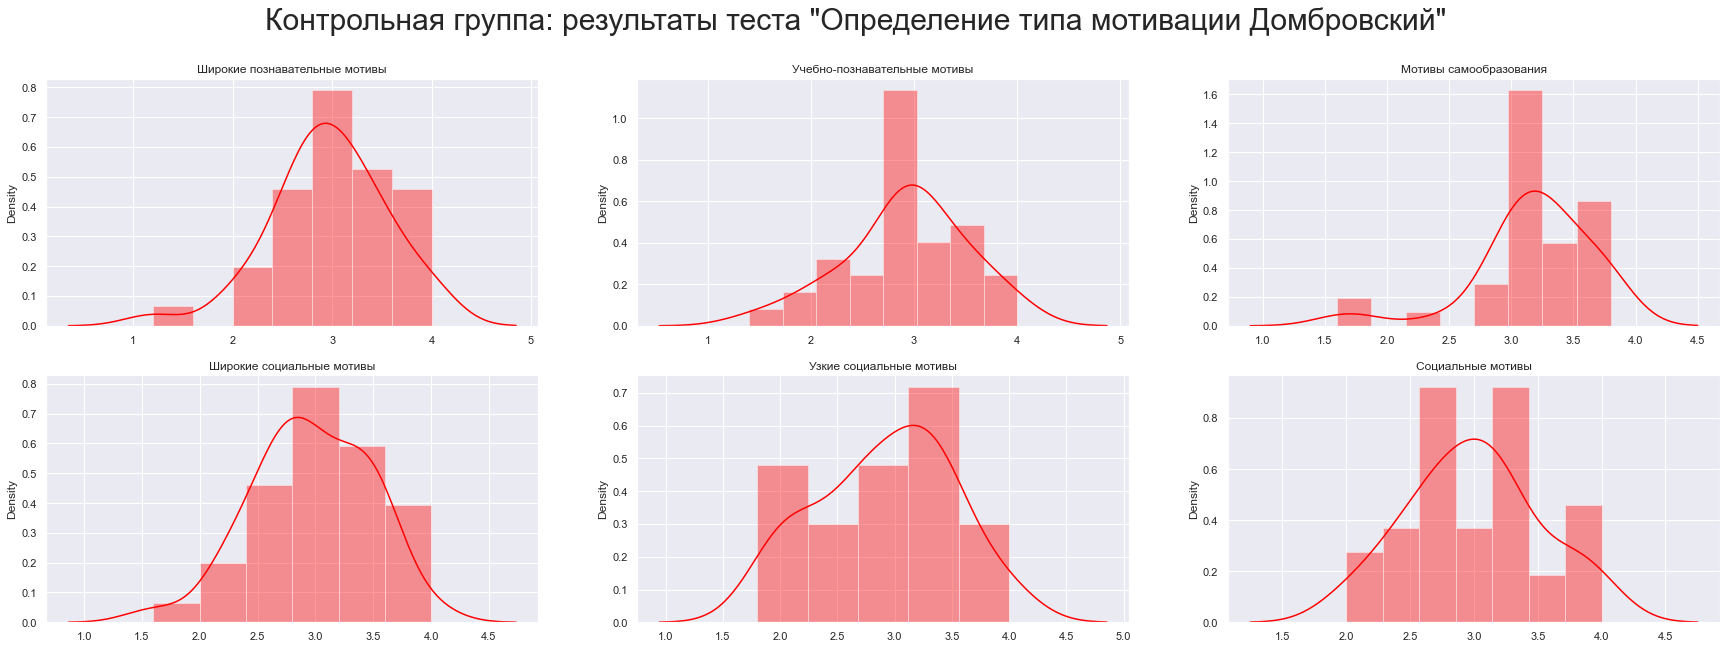

In [124]:
gist_mot(mot_psy_all, 'Контрольная группа')

In [125]:
def mw_student_mot(data1, data2):
    box_val = {}
    text0 = ' для Широкие познавательные мотивы'
    text1 = ' для учебно-познавательные мотивы'
    text2 = ' для мотивы самообразования'
    text3 = ' для широкие социальные мотивы'
    text4 = ' для узкие социальные мотивы'
    text5 = ' для социальные мотивы'
    for i in range(0, 6):
        if i == 0:
            text = text0
        elif i == 1:
            text = text1
        if i == 2:
            text = text2
        elif i == 3:
            text = text3
        if i == 4:
            text = text4
        elif i == 5:
            text = text5
        alpha = 0.05
        t_stat, p = stats.mannwhitneyu(data1[i], data2[i], method='exact', alternative='two-sided')
        text = text.replace('для', '').strip()
        box_val[f'{text}'] = (round(t_stat, 2), round(p,2))
        print('---->',  "t_stat = ",  t_stat, 'p-value ----> ', p)

        if p > alpha:
            print(f'Accept null hypothesis that the means are equal', text)
        else:
            print(f'Reject the null hypothesis that the means are equal', text)
    return box_val
            
box_val = mw_student_mot(mot_ped_all, mot_psy_all)    

----> t_stat =  616.0 p-value ---->  0.20587393177047905
Accept null hypothesis that the means are equal Широкие познавательные мотивы
----> t_stat =  588.5 p-value ---->  0.1231497300556055
Accept null hypothesis that the means are equal учебно-познавательные мотивы
----> t_stat =  544.5 p-value ---->  0.04595753137730303
Reject the null hypothesis that the means are equal мотивы самообразования
----> t_stat =  899.5 p-value ---->  0.10885563979501427
Accept null hypothesis that the means are equal широкие социальные мотивы
----> t_stat =  854.0 p-value ---->  0.2532866951511693
Accept null hypothesis that the means are equal узкие социальные мотивы
----> t_stat =  737.5 p-value ---->  0.9797981709719839
Accept null hypothesis that the means are equal социальные мотивы


In [126]:
df = pd.DataFrame(box_val).T
df = df.rename(columns = {0:'Статистический критерий', 1:'p-value'})
df = df.reset_index()
df['Вывод'] = df['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df['Методика'] = '«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска'
df = df.rename(columns={'index':'Критерий'})
df_motiv_before = df
df_motiv_before

,Критерий,Статистический критерий,p-value,Вывод,Методика
0,Широкие познавательные мотивы,616.0,0.21,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
1,учебно-познавательные мотивы,588.5,0.12,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
2,мотивы самообразования,544.5,0.05,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
3,широкие социальные мотивы,899.5,0.11,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
4,узкие социальные мотивы,854.0,0.25,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
5,социальные мотивы,737.5,0.98,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска


# Проверяем гипотезу о том, что c вероятностью 95% данные контрольной и экспериментальной групп (мотивационный компонент) различны при помощи критерия критерия Манна-Уитни

In [127]:
box_val_expert = mw_student_mot(mot_psy_all_fin_, mot_ped_all_fin_) 
df_motiv = pd.DataFrame(box_val_expert).T
df_motiv = df_motiv.rename(columns = {0:'Статистический критерий', 1:'p-value'})
df_motiv = df_motiv.reset_index()
df_motiv['Вывод'] = df_motiv['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df_motiv['Методика'] = '«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска'
df_motiv = df_motiv.rename(columns={'index':'Критерий'})
df_motiv

----> t_stat =  1031.0 p-value ---->  0.006492557529572551
Reject the null hypothesis that the means are equal Широкие познавательные мотивы
----> t_stat =  1002.0 p-value ---->  0.015434229336345206
Reject the null hypothesis that the means are equal учебно-познавательные мотивы
----> t_stat =  1192.5 p-value ---->  8.276994372530485e-06
Reject the null hypothesis that the means are equal мотивы самообразования
----> t_stat =  1155.0 p-value ---->  5.2293185597897025e-05
Reject the null hypothesis that the means are equal широкие социальные мотивы
----> t_stat =  1016.5 p-value ---->  0.010276281991753062
Reject the null hypothesis that the means are equal узкие социальные мотивы
----> t_stat =  1049.5 p-value ---->  0.0036211199331437154
Reject the null hypothesis that the means are equal социальные мотивы


,Критерий,Статистический критерий,p-value,Вывод,Методика
0,Широкие познавательные мотивы,1031.0,0.01,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
1,учебно-познавательные мотивы,1002.0,0.02,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
2,мотивы самообразования,1192.5,0.00,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
3,широкие социальные мотивы,1155.0,0.00,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
4,узкие социальные мотивы,1016.5,0.01,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
5,социальные мотивы,1049.5,0.00,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска


# Компонент самоорганиазция и самоуправление самообразовательной деятельности
    - Методика Самоорганизация деятельности

In [128]:
sam_ped_1 = [[25, 18, 17, 18, 19, 14, 30, 18, 11, 27, 18, 18, 17, 11, 11, 23, 29, 16, 16, 16, 20, 21], [12, 10, 18, 14, 17, 3, 4, 14, 9, 6, 10, 8, 14, 9, 9, 12, 6, 7, 7, 7, 17, 8]]
sam_psy_1 = [[29, 18, 18, 22, 27, 21, 30, 17, 17, 15, 25, 17, 18, 17, 17, 23, 19, 22, 20, 21, 23, 18, 17], [3, 9, 4, 10, 3, 8, 4, 18, 18, 6, 5, 5, 12, 18, 5, 15, 10, 15, 7, 8, 16, 10, 18]]
sam_ped_3 = [[27, 26, 20, 18, 17, 20, 22, 17, 23, 17, 23, 14, 25, 18, 23, 17, 18, 21], [16, 20, 5, 9, 14, 6, 10, 11, 3, 6, 15, 3, 3, 9, 18, 21, 11, 8]]
sam_psy_3 = [[28, 32, 21, 24, 31, 16, 24, 23, 12, 25, 18, 17, 17, 20, 24, 23, 24, 23], [20, 20, 10, 15, 11, 18, 11, 10, 7, 6, 10, 7, 20, 12, 21, 9, 16, 9]]

In [129]:
# данные полученные после эксперинмента
sam_ped_all_final = [[28, 34, 25, 23, 25, 22, 28, 25, 29, 19, 31, 19, 31, 24, 31, 23, 19, 28, 28, 20, 23, 24, 24, 22, 35, 25, 13, 29, 21, 20, 23, 17, 12, 28, 32, 24, 24, 19, 24, 22], [22, 26, 8, 10, 15, 7, 17, 15, 10, 9, 23, 11, 5, 11, 25, 27, 18, 10, 19, 14, 25, 22, 23, 7, 12, 22, 13, 8, 15, 16, 21, 12, 16, 19, 12, 13, 13, 13, 20, 12]]
sam_psy_all_final = [[27, 34, 20, 24, 31, 16, 26, 24, 12, 27, 18, 17, 18, 20, 26, 23, 23, 25, 28, 18, 17, 24, 27, 23, 29, 16, 16, 16, 25, 16, 19, 18, 17, 25, 19, 24, 21, 20, 25, 18, 19], [20, 19, 12, 14, 11, 18, 11, 12, 7, 7, 12, 7, 22, 11, 23, 9, 15, 11, 3, 10, 4, 12, 4, 7, 5, 19, 20, 8, 6, 4, 13, 18, 4, 15, 9, 16, 6, 8, 17, 10, 19]]




In [130]:
for i in range (len(sam_ped_1)):
    for j in sam_ped_1[i]:
        sam_ped_3[i].append(j)
for i in range (len(sam_psy_1)):
    for j in sam_psy_1[i]:
        sam_psy_3[i].append(j) 
# Данные для сравнения 
sam_ped_all = sam_ped_3
sam_psy_all = sam_psy_3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


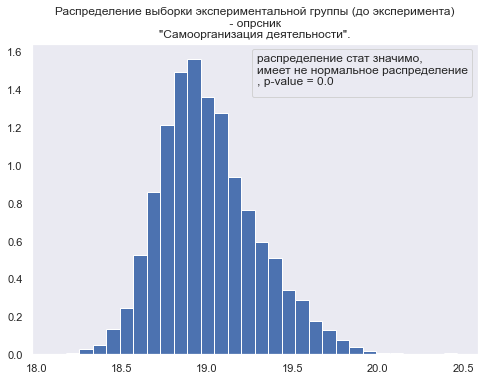

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


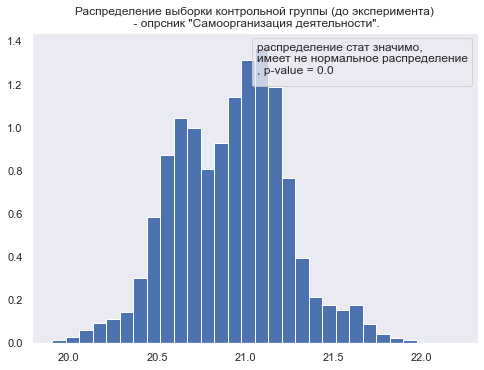

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


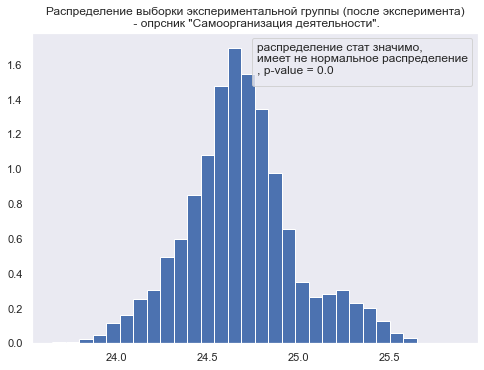

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


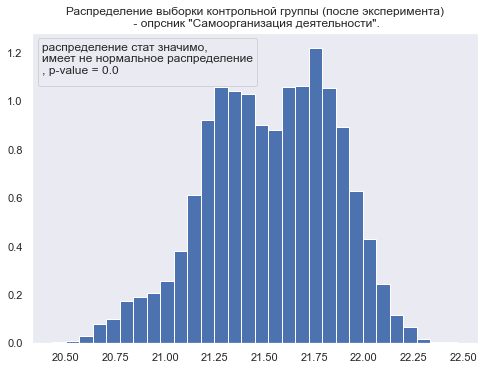

In [131]:
check_normal_or_not_distribution(sam_ped_all[0], 'выборки экспериментальной группы (до эксперимента)\n - опрсник \n"Самоорганизация деятельности".')
check_normal_or_not_distribution(sam_psy_all[0], 'выборки контрольной группы (до эксперимента)\n - опрсник "Самоорганизация деятельности".') 

check_normal_or_not_distribution(sam_ped_all_final[0], 'выборки экспериментальной группы (после эксперимента)\n - опрсник "Самоорганизация деятельности".')
check_normal_or_not_distribution(sam_psy_all_final[0], 'выборки контрольной группы (после эксперимента)\n - опрсник "Самоорганизация деятельности".') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


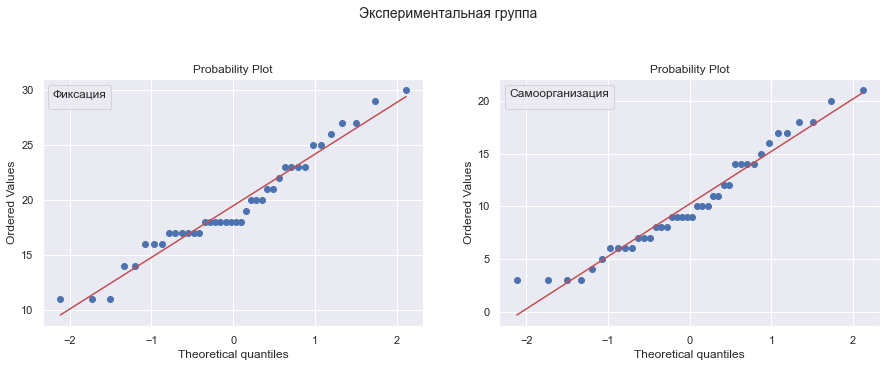

In [132]:
def plot_sam(sam_ped_all, name):
    fig = plt.gcf()
    fig.suptitle(name, fontsize=14) # Экспериментальная группа
    fig.set_size_inches(15, 10)

    pylab.subplot (2, 2, 1)
    stats.probplot(sam_ped_all[0], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Фиксация')

    pylab.subplot (2, 2, 2)
    stats.probplot(sam_ped_all[1], dist="norm", plot=pylab)
    legend = pylab.legend()
    legend.set_title (u'Самоорганизация')

    pylab.draw()
    
plot_sam(sam_ped_all, 'Экспериментальная группа')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


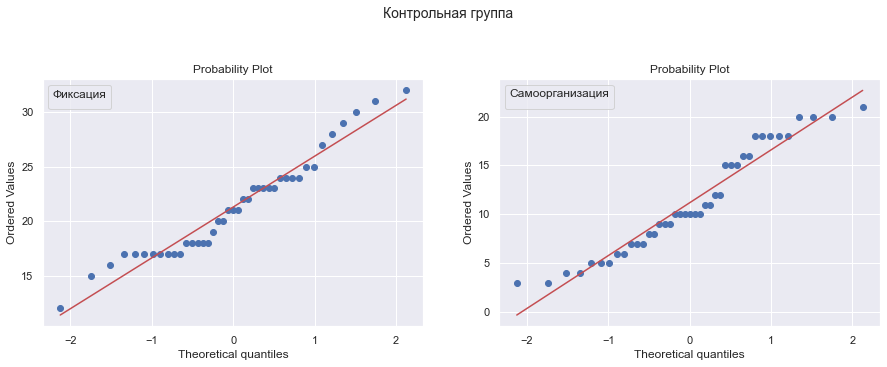

In [133]:
plot_sam(sam_psy_all, 'Контрольная группа')

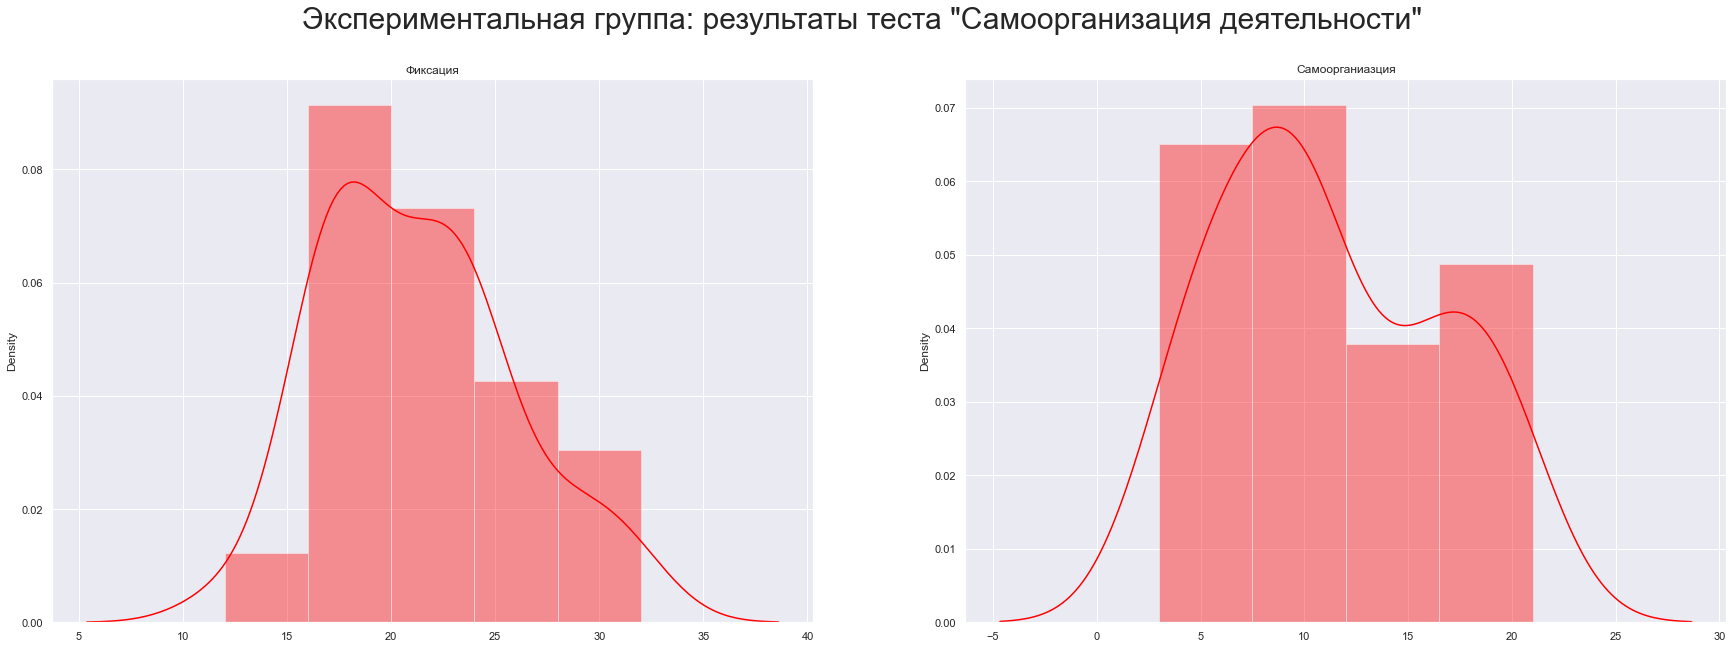

In [134]:
def bar_plot(sam_psy_all, name):
    figure, axis = plt.subplots(1, 2)
    figure.suptitle(f'{name} группа: результаты теста "Самоорганизация деятельности"', fontsize=30)
    figure.set_figheight(10)
    figure.set_figwidth(30)
    sns.distplot(sam_psy_all[0] ,color='red',label='bmi',ax=axis[0]).set_title(u'Фиксация')
    sns.distplot(sam_psy_all[1] ,color='red',label='bmi',ax=axis[1]).set_title(u'Самоорганиазция')
    plt.show()
    
bar_plot(sam_psy_all, 'Экспериментальная')

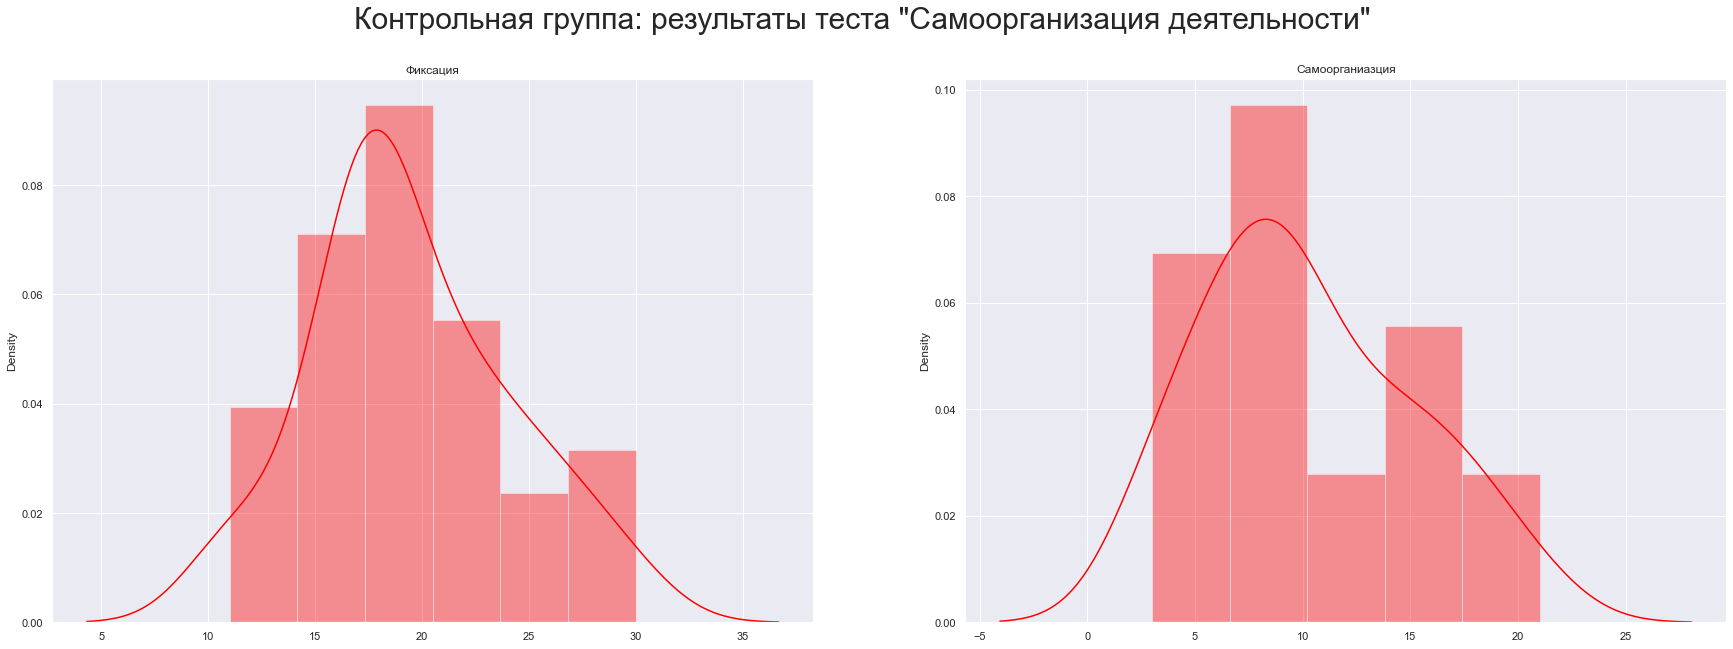

In [135]:
bar_plot(sam_ped_all, 'Контрольная')

In [136]:
def mw_student_sam(data1, data2):
    box_ = {}
    text0 = ' для фиксации'
    text1 = ' для самоорганизации'
    for i in range(0, 2):
        if i == 0:
            text = text0
        elif i == 1:
            text = text1
        alpha = 0.05
        t_stat, p = stats.mannwhitneyu(data1[i], data2[i])
        text = text.replace('для', '').strip()
        box_[f'{text}'] = {'Статистический критерий':t_stat, 'p-value':p}
        print('t_stat --- > ',t_stat, 'p-value ----> ', p)
        # interpret via critical value
        if p > alpha:
            print(f'Accept null hypothesis that the means are equal', text)
        else:
            print(f'Reject the null hypothesis that the means are equal', text) 
            
    return box_

In [137]:
box_ = mw_student_sam(sam_ped_all, sam_psy_all)
print("=================")
print('Существенной разницы между средними значениями выборок по тесту \nсамоорганизации между психологами и педагогами не наблюдается')

t_stat --- >  650.0 p-value ---->  0.10728981153209022
Accept null hypothesis that the means are equal фиксации
t_stat --- >  732.0 p-value ---->  0.40728389164566303
Accept null hypothesis that the means are equal самоорганизации
Существенной разницы между средними значениями выборок по тесту 
самоорганизации между психологами и педагогами не наблюдается


In [138]:
df = pd.DataFrame(box_).T
df = df.rename(columns = {0:'Статистический критерий', 1:'p-value'})
df = df.reset_index()
df['Вывод'] = df['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df['Методика'] = '«Самоорганиазция деятельности»'
df = df.rename(columns={'index':'Критерий'})
df_sam_before = df
df_sam_before

,Критерий,Статистический критерий,p-value,Вывод,Методика
0,фиксации,650.0,0.107290,Принимаем нулевую гипотезу: выборки одинаковы,«Самоорганиазция деятельности»
1,самоорганизации,732.0,0.407284,Принимаем нулевую гипотезу: выборки одинаковы,«Самоорганиазция деятельности»


# Проверяем гипотезу о том, что c вероятностью 95% данные контрольной и экспериментальной групп (компонент Самоорганизация и самоуправление самообразовательной деятельностью) различны при помощи критерия критерия Манна-Уитни

In [139]:
box_sam = mw_student_sam(sam_psy_all_final, sam_ped_all_final)   
print('Проверка данных на различие для экспериментальной группы')
box_sam

t_stat --- >  578.0 p-value ---->  0.0221581987419621
Reject the null hypothesis that the means are equal фиксации
t_stat --- >  529.0 p-value ---->  0.005984327157617884
Reject the null hypothesis that the means are equal самоорганизации
Проверка данных на различие для экспериментальной группы


{'фиксации': {'Статистический критерий': 578.0, 'p-value': 0.0221581987419621},
 'самоорганизации': {'Статистический критерий': 529.0,
  'p-value': 0.005984327157617884}}

In [140]:
df_sam = pd.DataFrame.from_dict(box_sam, orient='index')
df_sam['Критерий'] = 'Все данные'
df_sam['Вывод'] = df_sam['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df_sam['Методика'] = 'Самоорганизация самообразовательной деятельности'
df_sam = df_sam.reset_index()
del df_sam['index']
df_sam



,Статистический критерий,p-value,Критерий,Вывод,Методика
0,578.0,0.022158,Все данные,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Самоорганизация самообразовательной деятельности
1,529.0,0.005984,Все данные,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Самоорганизация самообразовательной деятельности


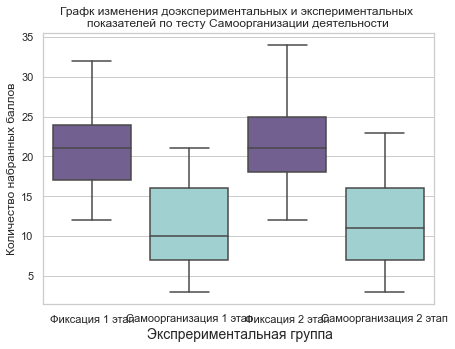

In [141]:
def plot_samoorg(sam_psy_all, sam_psy_all_final, name):
    df = pd.DataFrame(sam_psy_all, index = ['Фиксация 1 этап','Самоорганизация 1 этап'])
    df1 = pd.DataFrame(sam_psy_all_final, index = ['Фиксация 2 этап','Самоорганизация 2 этап'])
    df_all = pd.concat([df, df1])
    sns.set_theme(style="whitegrid")
    colors = ['#705898', '#98D8D8']
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_all.T), palette=colors)
    ax.axes.set_title("Графк изменения доэкспериментальных и экспериментальных \nпоказателей по тесту Самоорганизации деятельности", fontsize=12)
    ax.set_xlabel(f" {name} группа", fontsize=14)
    ax.set_ylabel("Количество набранных баллов", fontsize=12)
    sns.set(rc={'figure.figsize':(10,3)})
plot_samoorg(sam_psy_all, sam_psy_all_final, 'Экспрериментальная')



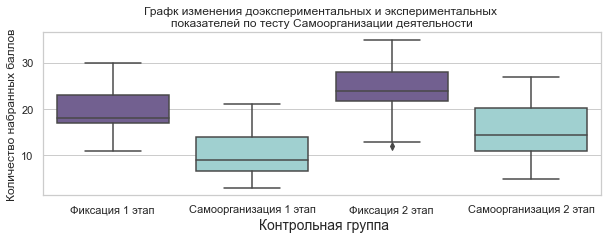

In [142]:
plot_samoorg(sam_ped_all, sam_ped_all_final, 'Контрольная')

# Когнитивный компонент самообразовательной деятельности
    -Методика "Особенности понятийного мышления"

In [143]:
iq_ped_3 = [33, 31, 16, 36, 9, 29, 32, 31, 35, 33, 26, 25, 41, 29, 30, 35, 29]
iq_psy_3 = [39, 31, 12, 39, 9, 32, 34, 34, 38, 37, 26, 28, 45, 34, 33, 36, 32, 31]
iq_ped_1 = [30, 24, 19, 33, 10, 20, 27, 28, 30, 32, 29, 24, 37, 30, 32, 32, 28, 25, 34]
iq_psy_1 = [31, 20, 18, 36, 13, 27, 30, 31, 35, 39, 29, 20, 43, 33, 34, 37, 31, 33]
iq_ped_all = iq_ped_3 + iq_ped_1
iq_psy_all = iq_psy_3 + iq_psy_1

In [144]:
iq_psy_1_fin = [33, 21, 18, 37, 15, 29, 32, 31, 37, 40, 30, 21, 45, 35, 34, 37, 33, 34]
iq_psy_3_fin = [39, 31, 14, 38, 9, 34, 34, 34, 38, 39, 28, 30, 47, 36, 33, 36, 33, 32]
iq_ped_all_fin = [40, 38, 32, 41, 24, 37, 38, 37, 40, 39, 30, 29, 49, 36, 36, 41, 35, 38, 29, 22, 40, 25, 27, 35, 31, 36, 37, 34, 30, 44, 37, 38, 39, 35, 32, 41]
iq_psy_all_fin = iq_psy_3_fin + iq_psy_1_fin

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


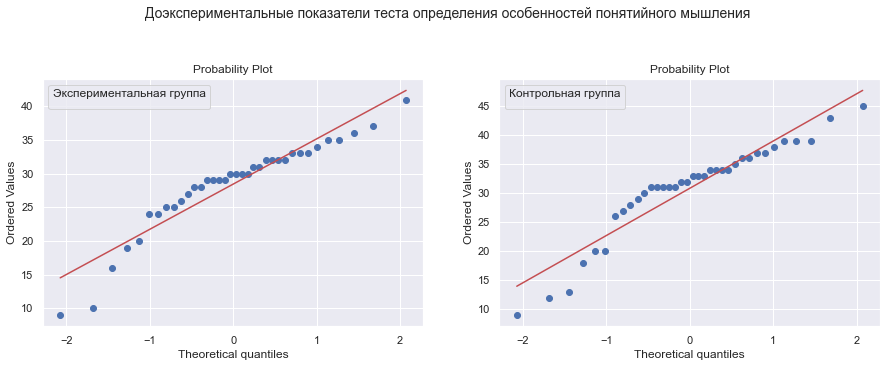

In [145]:
fig = plt.gcf()
fig.suptitle("Доэкспериментальные показатели теста определения особенностей понятийного мышления", fontsize=14)
fig.set_size_inches(15, 10)

pylab.subplot (2, 2, 1)
stats.probplot(iq_ped_all, dist="norm", plot=pylab)
legend = pylab.legend()
legend.set_title (u'Экспериментальная группа')

pylab.subplot (2, 2, 2)
stats.probplot(iq_psy_all, dist="norm", plot=pylab)
legend = pylab.legend()
legend.set_title (u'Контрольная группа')

pylab.draw()

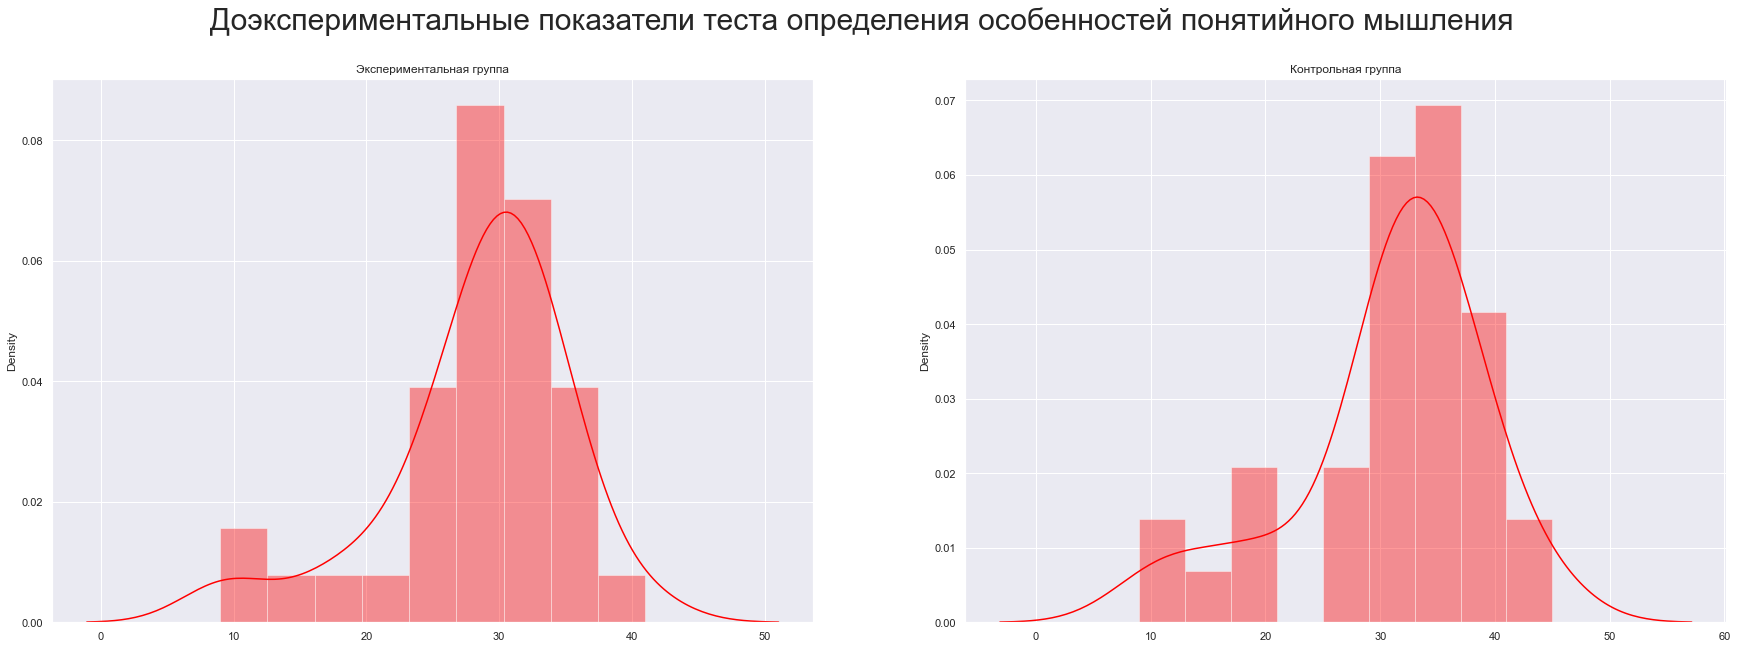

In [146]:
figure, axis = plt.subplots(1, 2)
figure.suptitle('Доэкспериментальные показатели теста определения особенностей понятийного мышления', fontsize=30)
figure.set_figheight(10)
figure.set_figwidth(30)
sns.distplot(iq_ped_all,color='red',label='bmi',ax=axis[0]).set_title(u'Экспериментальная группа')
sns.distplot(iq_psy_all,color='red',label='bmi',ax=axis[1]).set_title(u'Контрольная группа')
plt.show()

In [147]:
stat, p = shapiro(iq_ped_all)
stat1, p1 = normaltest(iq_ped_all)

stat_, p_ = shapiro(iq_psy_all)
stat_1, p_1 = normaltest(iq_psy_all)

dict_stat = {'Шапиро-Уилка':{"statistic эксп. группа":stat, 'pvalue эксп. группа':p},
            "Д’Агостино":{"statistic эксп. группа":stat1, 'pvalue эксп. группа':p1}}

dict_stat_ = {'Шапиро-Уилка':{"statistic контр. группа":stat_, 'pvalue контр. группа':p_},
            "Д’Агостино":{"statistic контр. группа":stat_1, 'pvalue контр. группа':p_1}}

df_stat = pd.DataFrame.from_dict(dict_stat, orient = 'index')
df_stat_ = pd.DataFrame.from_dict(dict_stat_, orient = 'index')
df_all = pd.concat([df_stat, df_stat_], axis=1)

print('---->  Можно сделать вывод, что данные имеют ненормальное распределение р < 0.5 ----> ')
df_all

---->  Можно сделать вывод, что данные имеют ненормальное распределение р < 0.5 ----> 


,statistic эксп. группа,pvalue эксп. группа,statistic контр. группа,pvalue контр. группа
Шапиро-Уилка,0.902556,0.004011,0.904169,0.004445
Д’Агостино,11.826637,0.002703,8.196234,0.016604


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


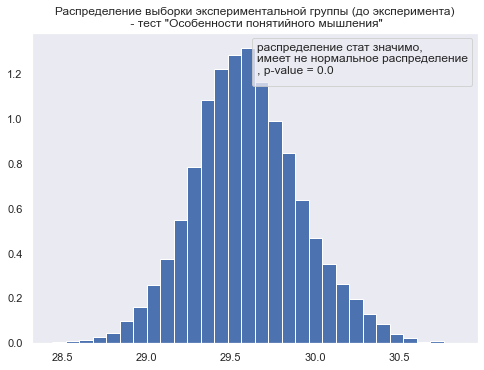

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


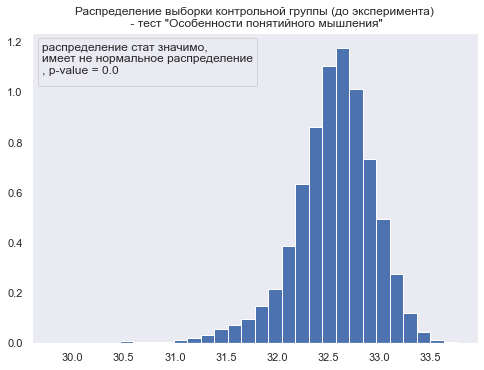

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


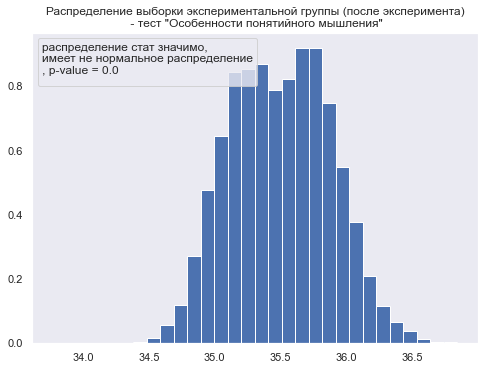

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


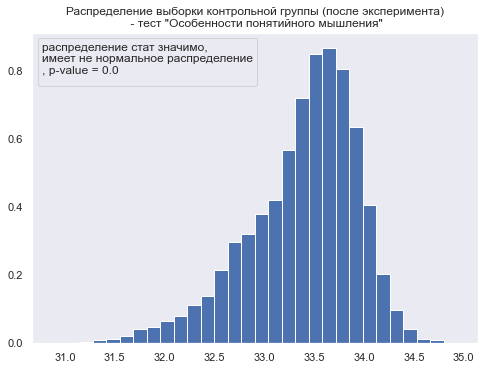

In [148]:
check_normal_or_not_distribution(iq_ped_all, 'выборки экспериментальной группы (до эксперимента)\n - тест "Особенности понятийного мышления"')
check_normal_or_not_distribution(iq_psy_all, 'выборки контрольной группы (до эксперимента)\n - тест "Особенности понятийного мышления"')

check_normal_or_not_distribution(iq_ped_all_fin, 'выборки экспериментальной группы (после эксперимента)\n - тест "Особенности понятийного мышления"')
check_normal_or_not_distribution(iq_psy_all_fin, 'выборки контрольной группы (после эксперимента)\n - тест "Особенности понятийного мышления"')



In [149]:
# Проверка данных на нормальность по описательной статистике
def get_describe_stat(all_psy, name_):
    avrg = np.mean(all_psy)
    moda = stats.mode(all_psy)
    mediana = np.median(all_psy)
    std = np.std(all_psy)
    axes = stats.kurtosis(all_psy, axis=0, bias=True)
    skewness = stats.skew(all_psy, axis=0, bias=True)
    dict_ = {f'Описательная статистика {name_} группа':{
        'Среднее значение':avrg,
        'Мода':moda[0][0],
        'Медиана':mediana,
        'Стандартное отклонение':std,
        'Эксцес':axes,
        'Асимметрия':skewness}
    }
    df_ = pd.DataFrame.from_dict(dict_, orient = 'index')
    return df_

df = get_describe_stat(iq_psy_all, 'контрольная')
df_1 = get_describe_stat(iq_ped_all, 'экспериментальная')
df_all = pd.concat([df, df_1])
df_all

,Среднее значение,Мода,Медиана,Стандартное отклонение,Эксцес,Асимметрия
Описательная статистика контрольная группа,30.833333,31,32.5,8.170067,0.696756,-1.018218
Описательная статистика экспериментальная группа,28.444444,29,30.0,6.763646,1.472577,-1.166087


In [150]:
# Сравнение контрольной и экспериментальной групп на схожесть данных
def mv_student_iq(data1, data2):
        box_ = {}
        text = 'тест понятийного мышления'
        alpha = 0.05
        t_stat, p = stats.mannwhitneyu(data1, data2, alternative='two-sided')
        print('t_stat ----> ', t_stat, 'p-value -----> ',  p)
        # interpret via critical value
        box_[text] = {'Статистический критерий':t_stat, 'p-value':p}
        if p > alpha:
            print(f'Accept null hypothesis that the means are equal', text)
        else:
            print(f'Reject the null hypothesis that the means are equal', text) 
        return box_

In [151]:
box_1 = mv_student_iq(iq_ped_all, iq_psy_all)
print('=====================')
print('Можно сделать вывод, что средние значения выборок \nпо тесту понятийного мышления между психологами \nи педагогами отличны друг от друга до эксперимента')




t_stat ---->  466.0 p-value ----->  0.04059452185594237
Reject the null hypothesis that the means are equal тест понятийного мышления
Можно сделать вывод, что средние значения выборок 
по тесту понятийного мышления между психологами 
и педагогами отличны друг от друга до эксперимента


In [152]:
df_4 = pd.DataFrame.from_dict(box_1, orient='index')
df_4['Критерий'] = 'Все данные'
df_4['Вывод'] = df_4['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df_4['Методика'] = 'Тест особенности понятийного мышщления'
df_myshl_befor = df_4
df_myshl_befor



,Статистический критерий,p-value,Критерий,Вывод,Методика
тест понятийного мышления,466.0,0.040595,Все данные,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Тест особенности понятийного мышщления


# Проверяем гипотезу о том, что c вероятностью 95% данные контрольной и экспериментальной групп (когнитивный компонент) различны при помощи критерия критерия Манна-Уитни

In [153]:
box_iq = mv_student_iq(iq_ped_all_fin, iq_psy_all_fin)
df_iq_ = pd.DataFrame.from_dict(box_iq, orient='index')
df_iq_['Критерий'] = 'Все данные'
df_iq_['Вывод'] = df_iq_['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df_iq_['Методика'] = 'Тест особенности понятийного мышщления'
df_iq_after = df_iq_
df_iq_after

t_stat ---->  826.5 p-value ----->  0.04461925122404936
Reject the null hypothesis that the means are equal тест понятийного мышления


,Статистический критерий,p-value,Критерий,Вывод,Методика
тест понятийного мышления,826.5,0.044619,Все данные,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Тест особенности понятийного мышщления


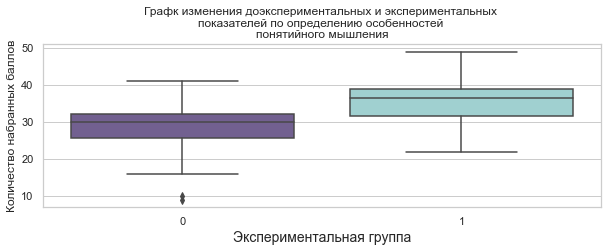

In [154]:
def plot_iq(iq_ped_all, iq_ped_all_fin, name):
    df_all = pd.DataFrame([iq_ped_all, iq_ped_all_fin])
    sns.set_theme(style="whitegrid")
    colors = ['#705898', '#98D8D8']
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_all.T), palette=colors)
    ax.axes.set_title("Графк изменения доэкспериментальных и экспериментальных \nпоказателей по определению особенностей \nпонятийного мышления", fontsize=12)
    ax.set_xlabel(f"{name} группа", fontsize=14)
    ax.set_ylabel("Количество набранных баллов", fontsize=12)
    sns.set(rc={'figure.figsize':(7,5)})
    
plot_iq(iq_ped_all, iq_ped_all_fin, 'Экспериментальная')

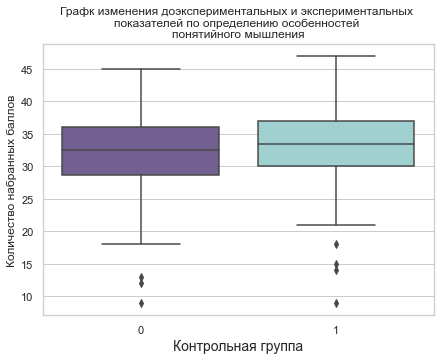

In [155]:
plot_iq(iq_psy_all, iq_psy_all_fin, 'Контрольная')

# Рефлексивный компонент самообразовательной деятельности
    - Авторский опросник "Самооценка личностных достижений самообразовательной деятельности"

In [156]:
samoozen_ped_1 = [151.0, 150.0, 168.0, 165.0, 178.0, 150.0, 154.0, 118.0, 182.0, 150.0, 175.0, 168.0, 127.0, 164.0, 173.0]
samoozen_psy_3 = [188.0, 190.0, 183.0, 182.0, 190.0, 157.0, 168.0, 183.0, 149.0, 130.0, 154.0, 155.0, 178.0, 157.0, 140.0, 169.0, 189.0, 159.0, 155.0, 139.0]
samoozen_ped_3 = [189.0, 189.0, 182.0, 183.0, 189.0, 156.0, 168.0, 182.0, 148.0, 130.0, 154.0, 155.0, 177.0, 158.0, 140.0, 152.0, 159.0, 154.0, 139.0]
samoozen_psy_1 = [150.0, 149.0, 169.0, 166.0, 178.0, 150.0, 155.0, 117.0, 181.0, 149.0, 175.0, 169.0, 128.0, 163.0, 173.0, 126.0, 165.0, 172.0]
all_ped_oz = samoozen_ped_1+samoozen_ped_3
all_psy_oz = samoozen_psy_1+samoozen_psy_3
all_ped_oz_fin = [163.0, 167.0, 180.0, 175.0, 189.0, 176.0, 166.0, 139.0, 192.0, 160.0, 185.0, 177.0, 135.0, 172.0, 179.0, 198.0, 198.0, 187.0, 192.0, 201.0, 168.0, 176.0, 187.0, 155.0, 136.0, 161.0, 163.0, 188.0, 163.0, 146.0, 163.0, 170.0, 163.0, 148.0]
all_psy_oz_fin = [150.0, 150.0, 168.0, 166.0, 178.0, 149.0, 156.0, 117.0, 180.0, 150.0, 176.0, 170.0, 129.0, 164.0, 172.0, 125.0, 165.0, 173.0, 187.0, 190.0, 183.0, 183.0, 189.0, 158.0, 167.0, 184.0, 150.0, 131.0, 153.0, 154.0, 178.0, 157.0, 140.0, 168.0, 190.0, 158.0, 154.0, 139.0]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


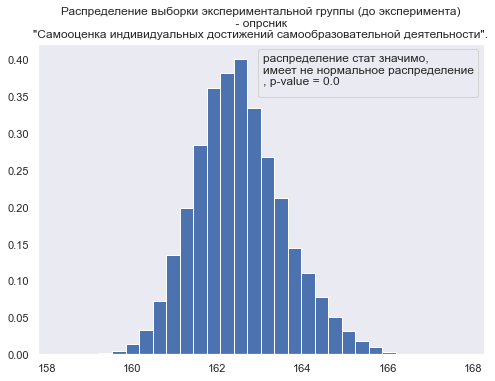

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


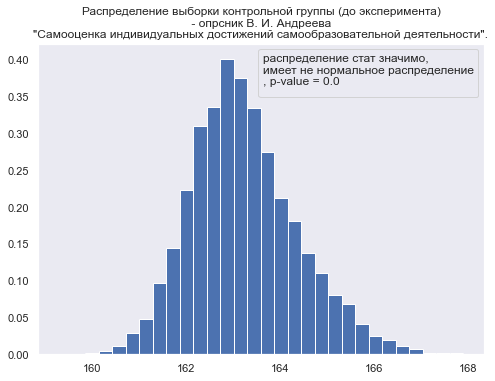

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


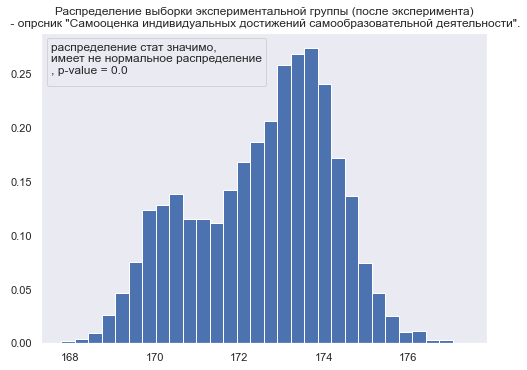

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


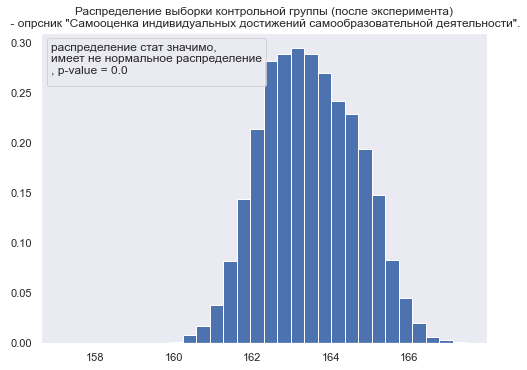

In [157]:
check_normal_or_not_distribution(all_ped_oz, 'выборки экспериментальной группы (до эксперимента)\n - опрсник \n"Самооценка индивидуальных достижений самообразовательной деятельности".')
check_normal_or_not_distribution(all_psy_oz, 'выборки контрольной группы (до эксперимента)\n - опрсник В. И. Андреева \n"Самооценка индивидуальных достижений самообразовательной деятельности".') 

check_normal_or_not_distribution(all_ped_oz_fin, 'выборки экспериментальной группы (после эксперимента)\n - опрсник "Самооценка индивидуальных достижений самообразовательной деятельности".')
check_normal_or_not_distribution(all_psy_oz_fin, 'выборки контрольной группы (после эксперимента)\n - опрсник "Самооценка индивидуальных достижений самообразовательной деятельности".') 

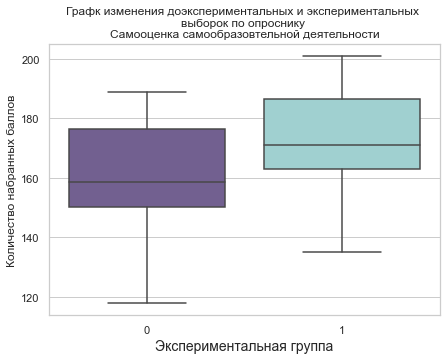

In [158]:
def plot_samooz(all_ped_oz, all_ped_oz_fin, name):
    df_all = pd.DataFrame([all_ped_oz, all_ped_oz_fin])
    sns.set_theme(style="whitegrid")
    colors = ['#705898', '#98D8D8']
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_all.T), palette=colors)
    ax.axes.set_title("Графк изменения доэкспериментальных и экспериментальных \nвыборок по опроснику \nСамооценка самообразовтельной деятельности", fontsize=12)
    ax.set_xlabel(f"{name} группа", fontsize=14)
    ax.set_ylabel("Количество набранных баллов", fontsize=12)
    sns.set(rc={'figure.figsize':(7,5)})
    
plot_samooz(all_ped_oz, all_ped_oz_fin, 'Экспериментальная')

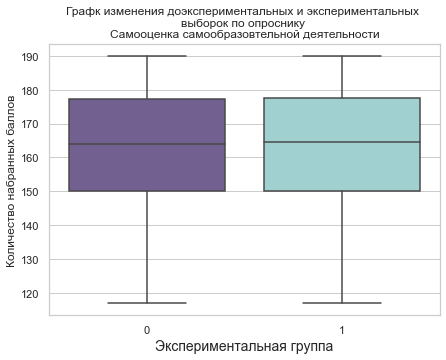

In [159]:
plot_samooz(all_psy_oz, all_psy_oz_fin, 'Экспериментальная')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


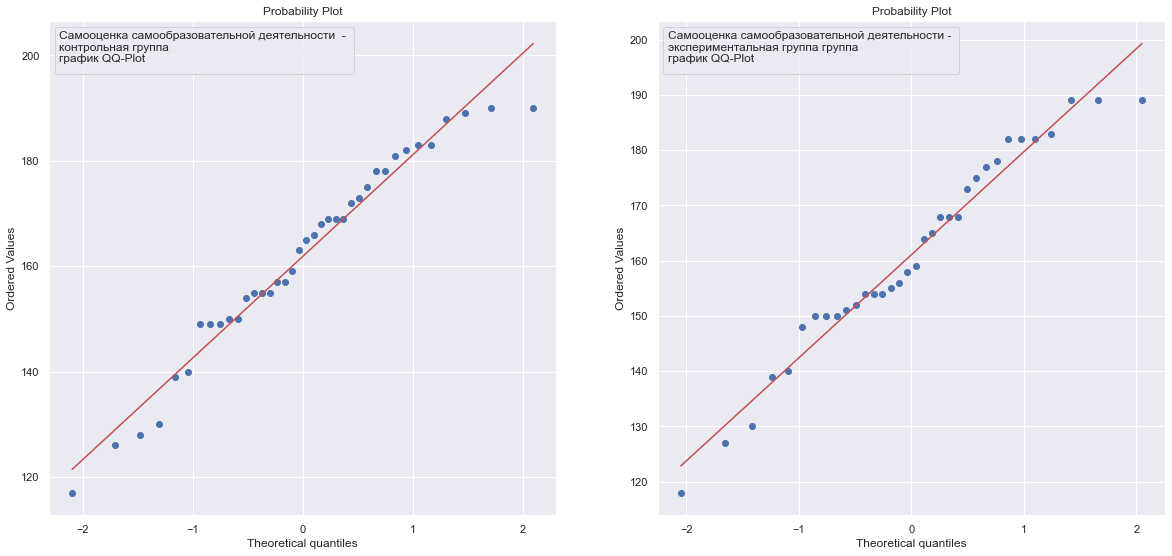

In [160]:
fig = plt.gcf()
fig.set_size_inches(20, 20)
pylab.subplot (2, 2, 2)
stats.probplot(all_ped_oz, dist="norm", plot=pylab)
legend = pylab.legend()
legend.set_title (u'Самооценка самообразовательной деятельности - \nэкспериментальная группа группа\nграфик QQ-Plot')
pylab.subplot (2, 2, 1)
stats.probplot(all_psy_oz, dist="norm", plot=pylab)
legend = pylab.legend()
legend.set_title (u'Самооценка самообразовательной деятельности  - \nконтрольная группа\nграфик QQ-Plot')
pylab.show()
pylab.show()

In [161]:
# Проверка данных на нормальность по описательной статистике
def get_describe_stat(all_psy, name_):
    avrg = np.mean(all_psy)
    moda = stats.mode(all_psy)
    mediana = np.median(all_psy)
    std = np.std(all_psy)
    axes = stats.kurtosis(all_psy, axis=0, bias=True)
    skewness = stats.skew(all_psy, axis=0, bias=True)
    dict_ = {f'Описательная статистика {name_} группа':{
        'Среднее значение':avrg,
        'Мода':moda[0][0],
        'Медиана':mediana,
        'Стандартное отклонение':std,
        'Эксцес':axes,
        'Асимметрия':skewness}
    }
    df_ = pd.DataFrame.from_dict(dict_, orient = 'index')
    return df_

df = get_describe_stat(all_psy_oz, 'контрольная')
df_1 = get_describe_stat(all_ped_oz, 'экспериментальная')
df_all = pd.concat([df, df_1])
df_all

,Среднее значение,Мода,Медиана,Стандартное отклонение,Эксцес,Асимметрия
Описательная статистика контрольная группа,161.842105,149.0,164.0,18.711840,-0.458875,-0.440346
Описательная статистика экспериментальная группа,161.088235,150.0,158.5,18.020197,-0.460582,-0.310971


In [162]:
stat, p = shapiro(all_ped_oz)
stat1, p1 = normaltest(all_ped_oz)

stat_, p_ = shapiro(all_psy_oz)
stat_1, p_1 = normaltest(all_psy_oz)

dict_stat = {'Шапиро-Уилка':{"statistic эксп. группа":stat, 'pvalue эксп. группа':p},
            "Д’Агостино":{"statistic эксп. группа":stat1, 'pvalue эксп. группа':p1}}

dict_stat_ = {'Шапиро-Уилка':{"statistic контр. группа":stat_, 'pvalue контр. группа':p_},
            "Д’Агостино":{"statistic контр. группа":stat_1, 'pvalue контр. группа':p_1}}

df_stat = pd.DataFrame.from_dict(dict_stat, orient = 'index')
df_stat_ = pd.DataFrame.from_dict(dict_stat_, orient = 'index')
df_all = pd.concat([df_stat, df_stat_], axis=1)

print('----->  можно сделать вывод, что данные распределены нормальным образом   -----> ')
df_all


----->  можно сделать вывод, что данные распределены нормальным образом   -----> 


,statistic эксп. группа,pvalue эксп. группа,statistic контр. группа,pvalue контр. группа
Шапиро-Уилка,0.961438,0.267661,0.961552,0.213164
Д’Агостино,0.796195,0.671596,1.636080,0.441296


In [163]:
# check data on normal distribution befor experiment

stat, p = stats.ttest_ind(all_ped_oz, all_psy_oz)
print(f'Можно сделать вывод, что сравнение доэкспериментальных средних значений \nэкспериментальной и контрольной групп не различаются \nпри t = {stat} и p-value = {p}')
box_oz = {'Самооценка самообразовательной деятельности': {'Статистический критерий': stat,
  'p-value': p}}

df_oz = pd.DataFrame.from_dict(box_oz, orient='index')
df_oz['Критерий'] = 'Все данные'
df_oz['Вывод'] = df_oz['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df_oz['Методика'] = 'Самооценка самообразовательной деятельности'
df_oz_before = df_oz.reset_index()
del df_oz_before['index']
df_oz_before


Можно сделать вывод, что сравнение доэкспериментальных средних значений 
экспериментальной и контрольной групп не различаются 
при t = -0.17123737219705734 и p-value = 0.8645311588399238


,Статистический критерий,p-value,Критерий,Вывод,Методика
0,-0.171237,0.864531,Все данные,Принимаем нулевую гипотезу: выборки одинаковы,Самооценка самообразовательной деятельности


# Проверяем гипотезу о том, что c вероятностью 95% данные контрольной и экспериментальной групп (рефлексивный компонент) различны при помощи критерия критерия Стьюдента

In [164]:
stat, p = stats.ttest_ind(all_ped_oz_fin, all_psy_oz_fin)
print(f'Можно сделать вывод, что сравнение доэкспериментальных средних значений \nэкспериментальной и контрольной групп различаются \nпри t = {stat} и p-value = {p}')
box_oz = {'Самооценка самообразовательной деятельности': {'Статистический критерий': stat,
  'p-value': p}}
box_oz

Можно сделать вывод, что сравнение доэкспериментальных средних значений 
экспериментальной и контрольной групп различаются 
при t = 2.134305740623742 и p-value = 0.03632180612512025


{'Самооценка самообразовательной деятельности': {'Статистический критерий': 2.134305740623742,
  'p-value': 0.03632180612512025}}

In [165]:
df_oz = pd.DataFrame.from_dict(box_oz, orient='index')
df_oz['Критерий'] = 'Все данные'
df_oz['Вывод'] = df_oz['p-value'].apply(lambda x: 'Принимаем нулевую гипотезу: выборки одинаковы ' if float(x) > 0.05 else 'Принимаем альтернативную гипотезу: выборки отличны друг от друга')
df_oz['Методика'] = 'Самооценка самообразовательной деятельности'
df_oz = df_oz.reset_index()
del df_oz['index']
df_oz

,Статистический критерий,p-value,Критерий,Вывод,Методика
0,2.134306,0.036322,Все данные,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Самооценка самообразовательной деятельности


# В таблице представлены сравнения контрольной и экспериментальной групп до проведения эксперимента

In [167]:
df_all_before = pd.concat([df_andr_before, df_motiv_before, df_sam_before, df_myshl_befor, df_oz_before]) # df_andr_before, df_motiv_before, df_sam_before, df_myshl_befor, df_oz_before
df_all_before = df_all_before.reset_index()
del df_all_before['index']
df_all_before['p-value'] = df_all_before['p-value'].apply(lambda x: round(x, 2))
df_all_before['Статистический критерий'] = df_all_before['Статистический критерий'].apply(lambda x: round(x, 2))
df_all_before

,Критерий,Статистический критерий,p-value,Вывод,Методика
0,Все данные,810.00,0.62,Принимаем нулевую гипотезу: выборки одинаковы,Тест В. И. Андреева
1,Широкие познавательные мотивы,616.00,0.21,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
2,учебно-познавательные мотивы,588.50,0.12,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
3,мотивы самообразования,544.50,0.05,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
4,широкие социальные мотивы,899.50,0.11,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
5,узкие социальные мотивы,854.00,0.25,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
6,социальные мотивы,737.50,0.98,Принимаем нулевую гипотезу: выборки одинаковы,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
7,фиксации,650.00,0.11,Принимаем нулевую гипотезу: выборки одинаковы,«Самоорганиазция деятельности»
8,самоорганизации,732.00,0.41,Принимаем нулевую гипотезу: выборки одинаковы,«Самоорганиазция деятельности»
9,Все данные,466.00,0.04,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Тест особенности понятийного мышщления


# В таблице представлены результаты сравнения контрольной и экспериментальной группа после проведения эксперимента

In [168]:
df_all = pd.concat([df_motiv, df_sam, df_andr, df_iq_after, df_oz])
df_all = df_all.reset_index()
del df_all['index']
df_all['p-value'] = df_all['p-value'].apply(lambda x: round(x, 2))
df_all['Статистический критерий'] = df_all['Статистический критерий'].apply(lambda x: round(x, 2))
df_all

,Критерий,Статистический критерий,p-value,Вывод,Методика
0,Широкие познавательные мотивы,1031.00,0.01,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
1,учебно-познавательные мотивы,1002.00,0.02,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
2,мотивы самообразования,1192.50,0.00,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
3,широкие социальные мотивы,1155.00,0.00,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
4,узкие социальные мотивы,1016.50,0.01,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
5,социальные мотивы,1049.50,0.00,Принимаем альтернативную гипотезу: выборки отличны друг от друга,«Мотивация учебной деятельности: уровни и типы» И. С. Домбровска
6,Все данные,578.00,0.02,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Самоорганизация самообразовательной деятельности
7,Все данные,529.00,0.01,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Самоорганизация самообразовательной деятельности
8,Все данные,2.12,0.04,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Тест В. И. Андреева
9,Все данные,826.50,0.04,Принимаем альтернативную гипотезу: выборки отличны друг от друга,Тест особенности понятийного мышщления
